# Trabalho 2 - Linguagens de Programação - EEL670 - 21.2

## Bike Sharing Demand
Forecast use of a city bikeshare system

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

### 1. Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 2. Coleta dos dados

In [2]:
# train: dados de treino
train = pd.read_csv("bike-sharing-demand/train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# test: dados de teste
test = pd.read_csv("bike-sharing-demand/test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### 3. Tratamento dos dados

In [4]:
# Verificando a existência de valores null
train.isnull().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
# Verificando a existência de valores null
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [6]:
# Verificando a existência de valores nan
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
# Verificando a existência de valores nan
test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [8]:
# Verificando os tipos das colunas
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
# Verificando os tipos das colunas
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

In [10]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['hour'] = train['datetime'].dt.hour
train['day_of_week'] = train['datetime'].dt.dayofweek
train['day'] = train['datetime'].dt.day
train['week_of_year'] = train['datetime'].dt.isocalendar().week
train['month'] = train['datetime'].dt.month
train['quarter'] = train['datetime'].dt.quarter
train['year'] = train['datetime'].dt.year

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day_of_week,day,week_of_year,month,quarter,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,52,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,52,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,52,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,52,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,52,1,1,2011


In [11]:
test['datetime'] = pd.to_datetime(test['datetime'])

test['hour'] = test['datetime'].dt.hour
test['day_of_week'] = test['datetime'].dt.dayofweek
test['day'] = test['datetime'].dt.day
test['week_of_year'] = test['datetime'].dt.isocalendar().week
test['month'] = test['datetime'].dt.month
test['quarter'] = test['datetime'].dt.quarter
test['year'] = test['datetime'].dt.year

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day_of_week,day,week_of_year,month,quarter,year
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,3,20,3,1,1,2011
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3,20,3,1,1,2011
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,3,20,3,1,1,2011
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,3,20,3,1,1,2011
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,3,20,3,1,1,2011


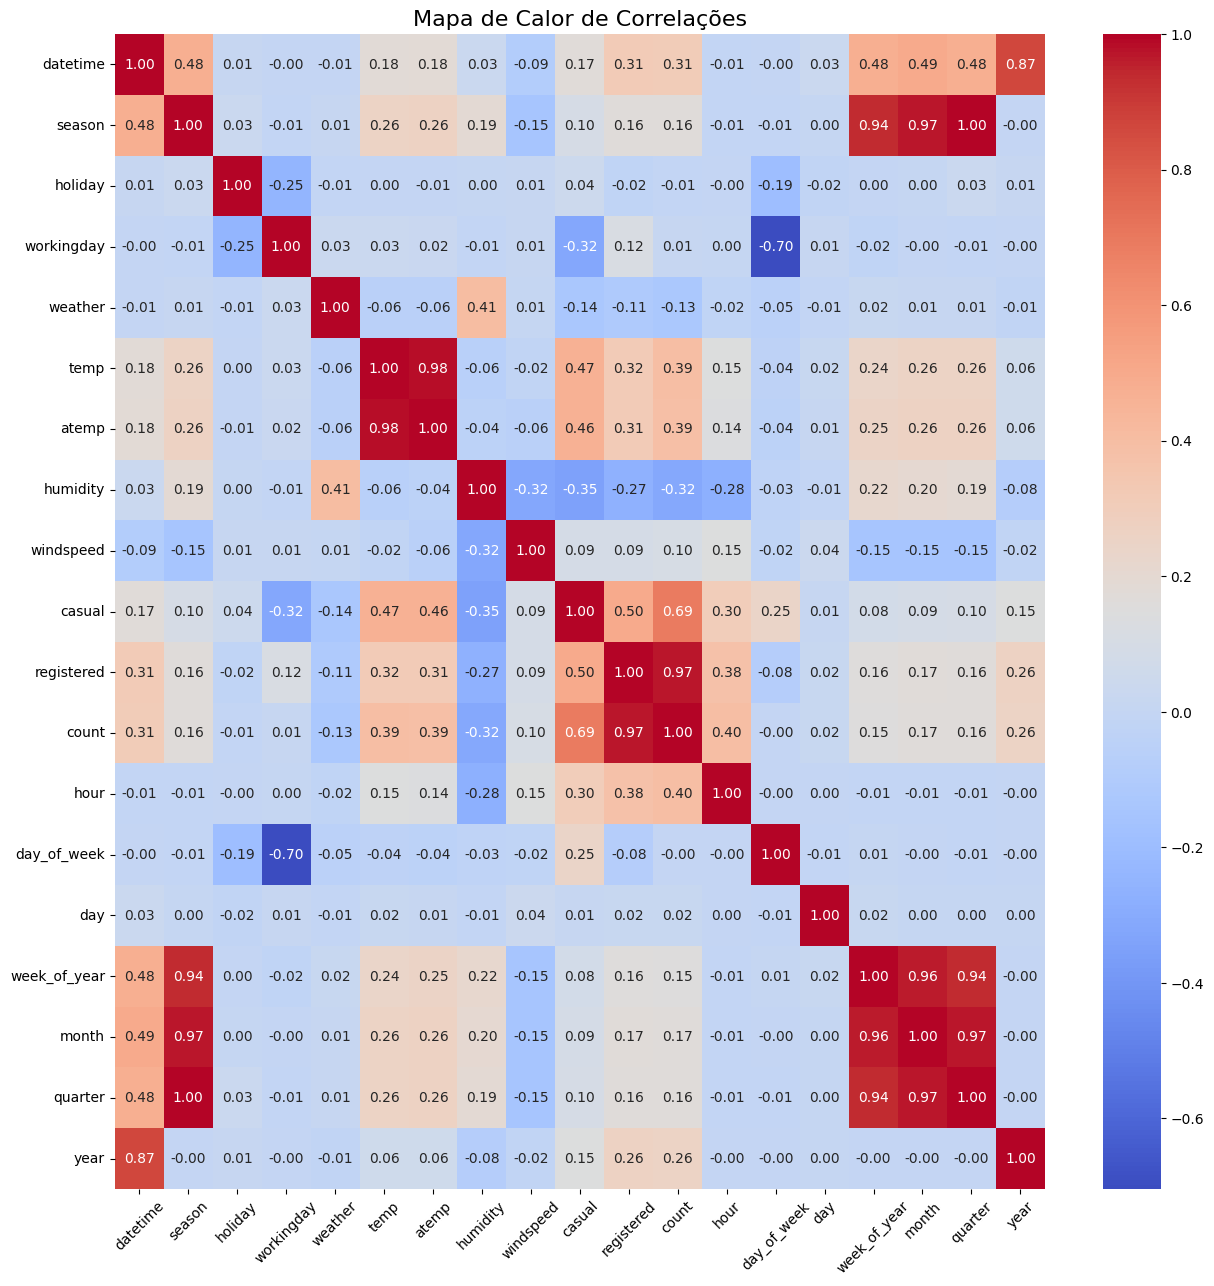

In [35]:

# Calcular as correlações
correlacao = train.corr()

# Ajustar o tamanho da figura
plt.figure(figsize=(15, 15))

# Criar o heatmap com anotações e personalizações
heatmap = sns.heatmap(data=correlacao, annot=True, fmt=".2f", cmap='coolwarm')

# Aumentar o tamanho das fontes dos valores de correlação
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

# Adicionar título
plt.title('Mapa de Calor de Correlações', fontsize=16)

# Rotacionar os rótulos dos eixos
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar o gráfico
plt.show()

### 4. Análise dos dados

In [13]:
# Para ter uma maios noção dos dados
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day_of_week,day,week_of_year,month,quarter,year
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,3.013963,9.992559,25.917784,6.521495,2.506614,2011.501929
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,2011.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,1.000000,5.000000,14.0,4.000000,2.000000,2011.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,3.000000,10.000000,26.0,7.000000,3.000000,2012.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,5.000000,15.000000,40.0,10.000000,4.000000,2012.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,6.000000,19.000000,52.0,12.000000,4.000000,2012.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,2.004585,5.476608,15.017269,3.444373,1.116174,0.500019


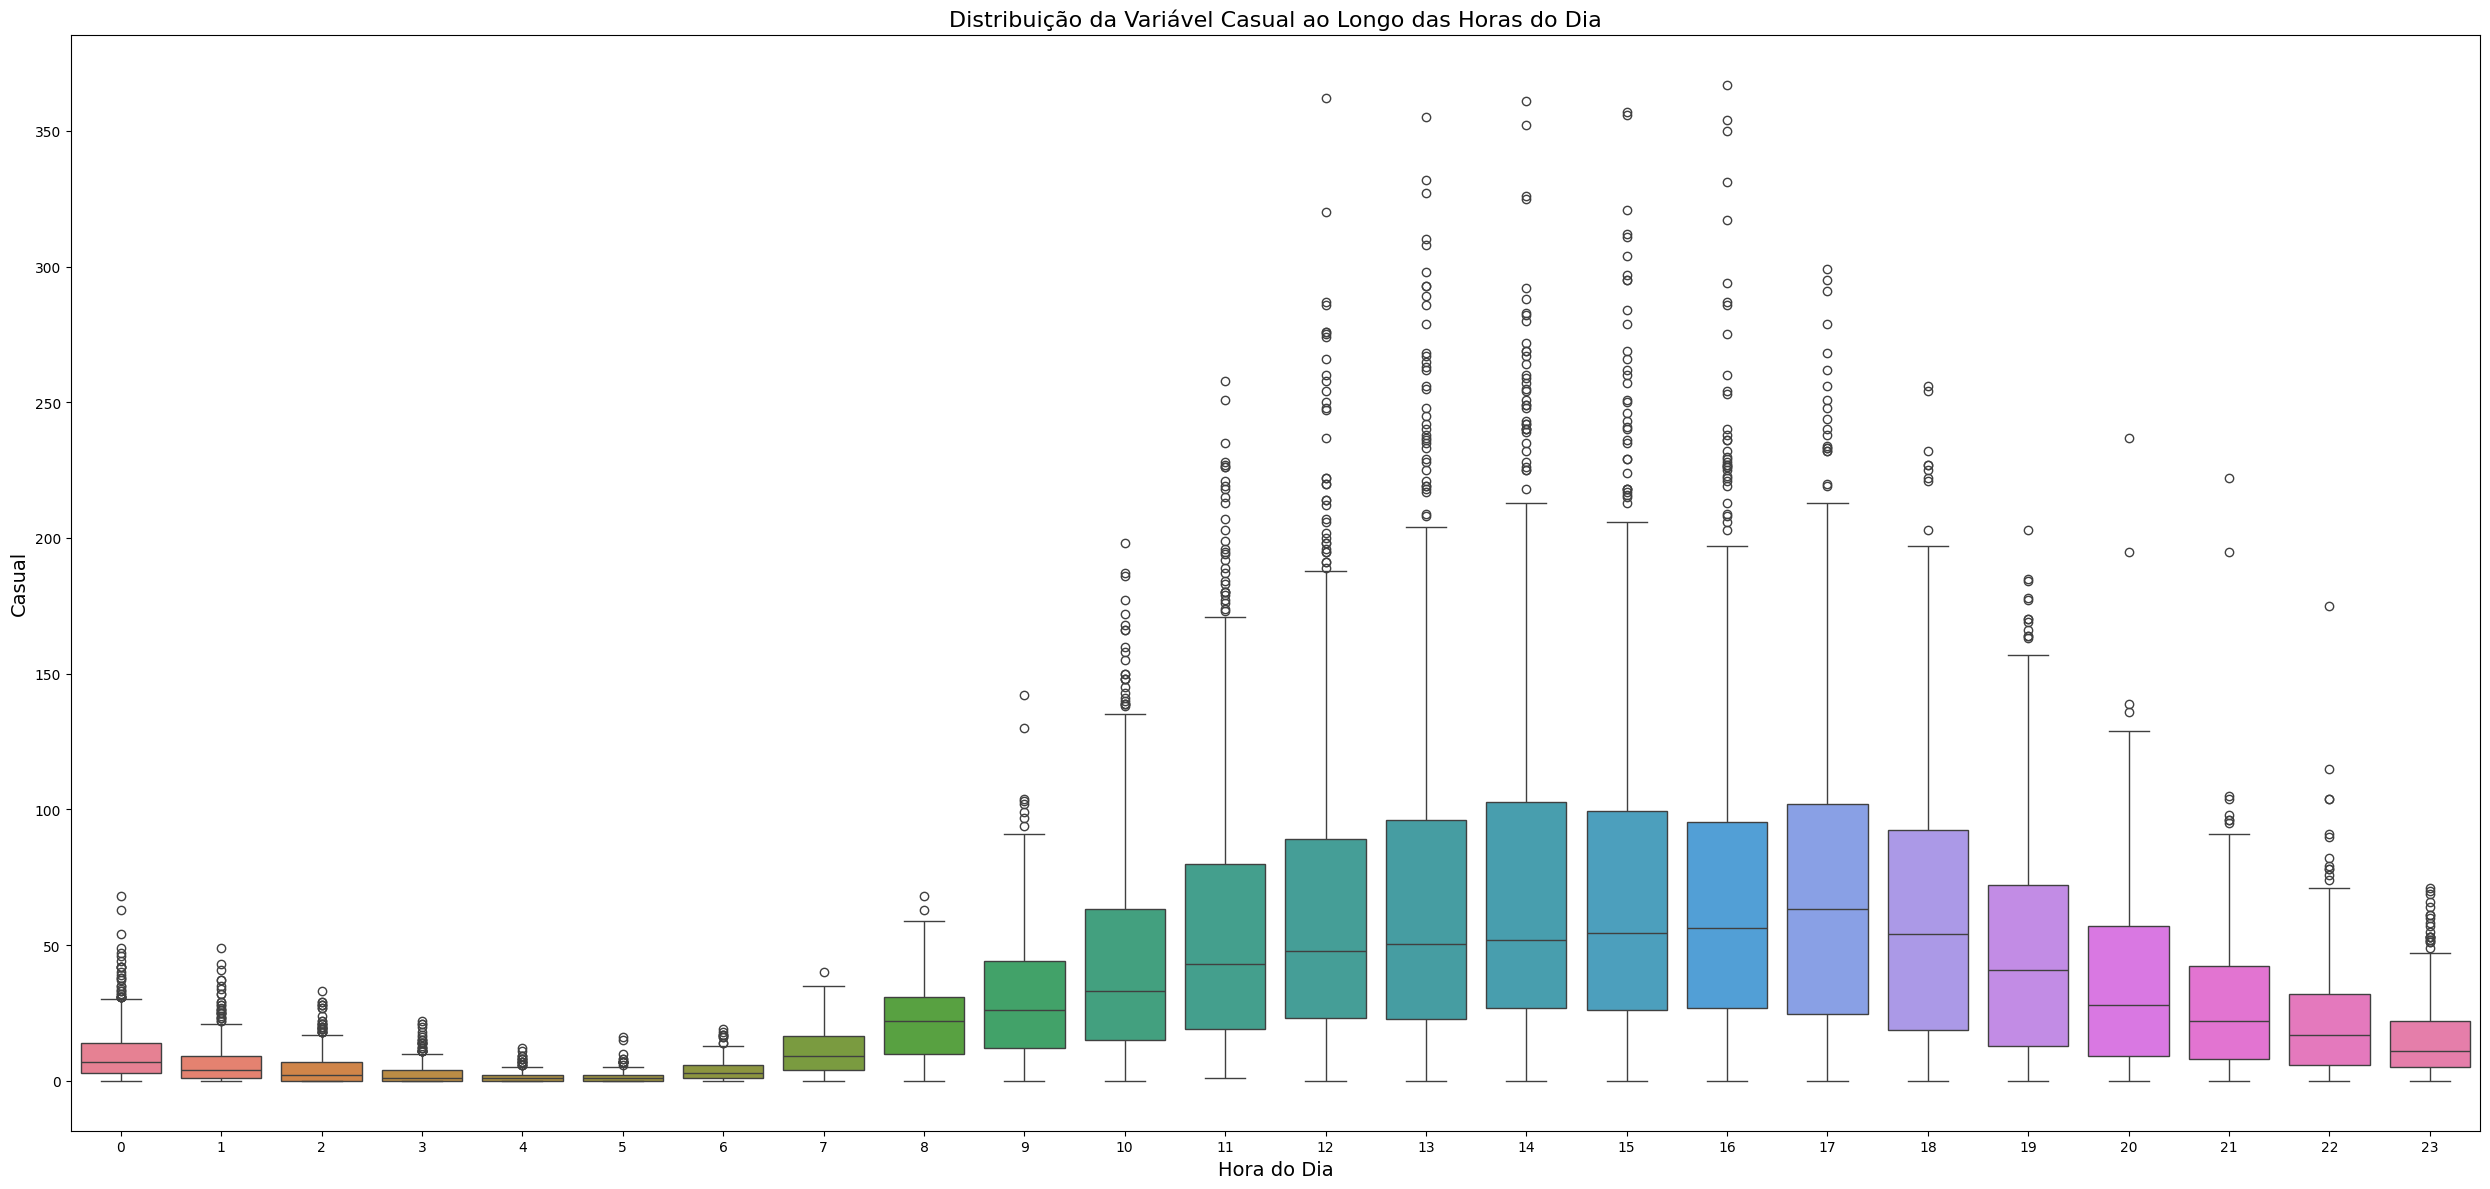

In [14]:
# Ajuste do tamanho da figura
plt.figure(figsize=(25, 12))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 24)

# Boxplot
sns.boxplot(x="hour", y="casual", data=train, hue="hour", palette=palette, legend=False)

# Título e rótulos dos eixos
plt.title('Distribuição da Variável Casual ao Longo das Horas do Dia', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Casual', fontsize=14)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

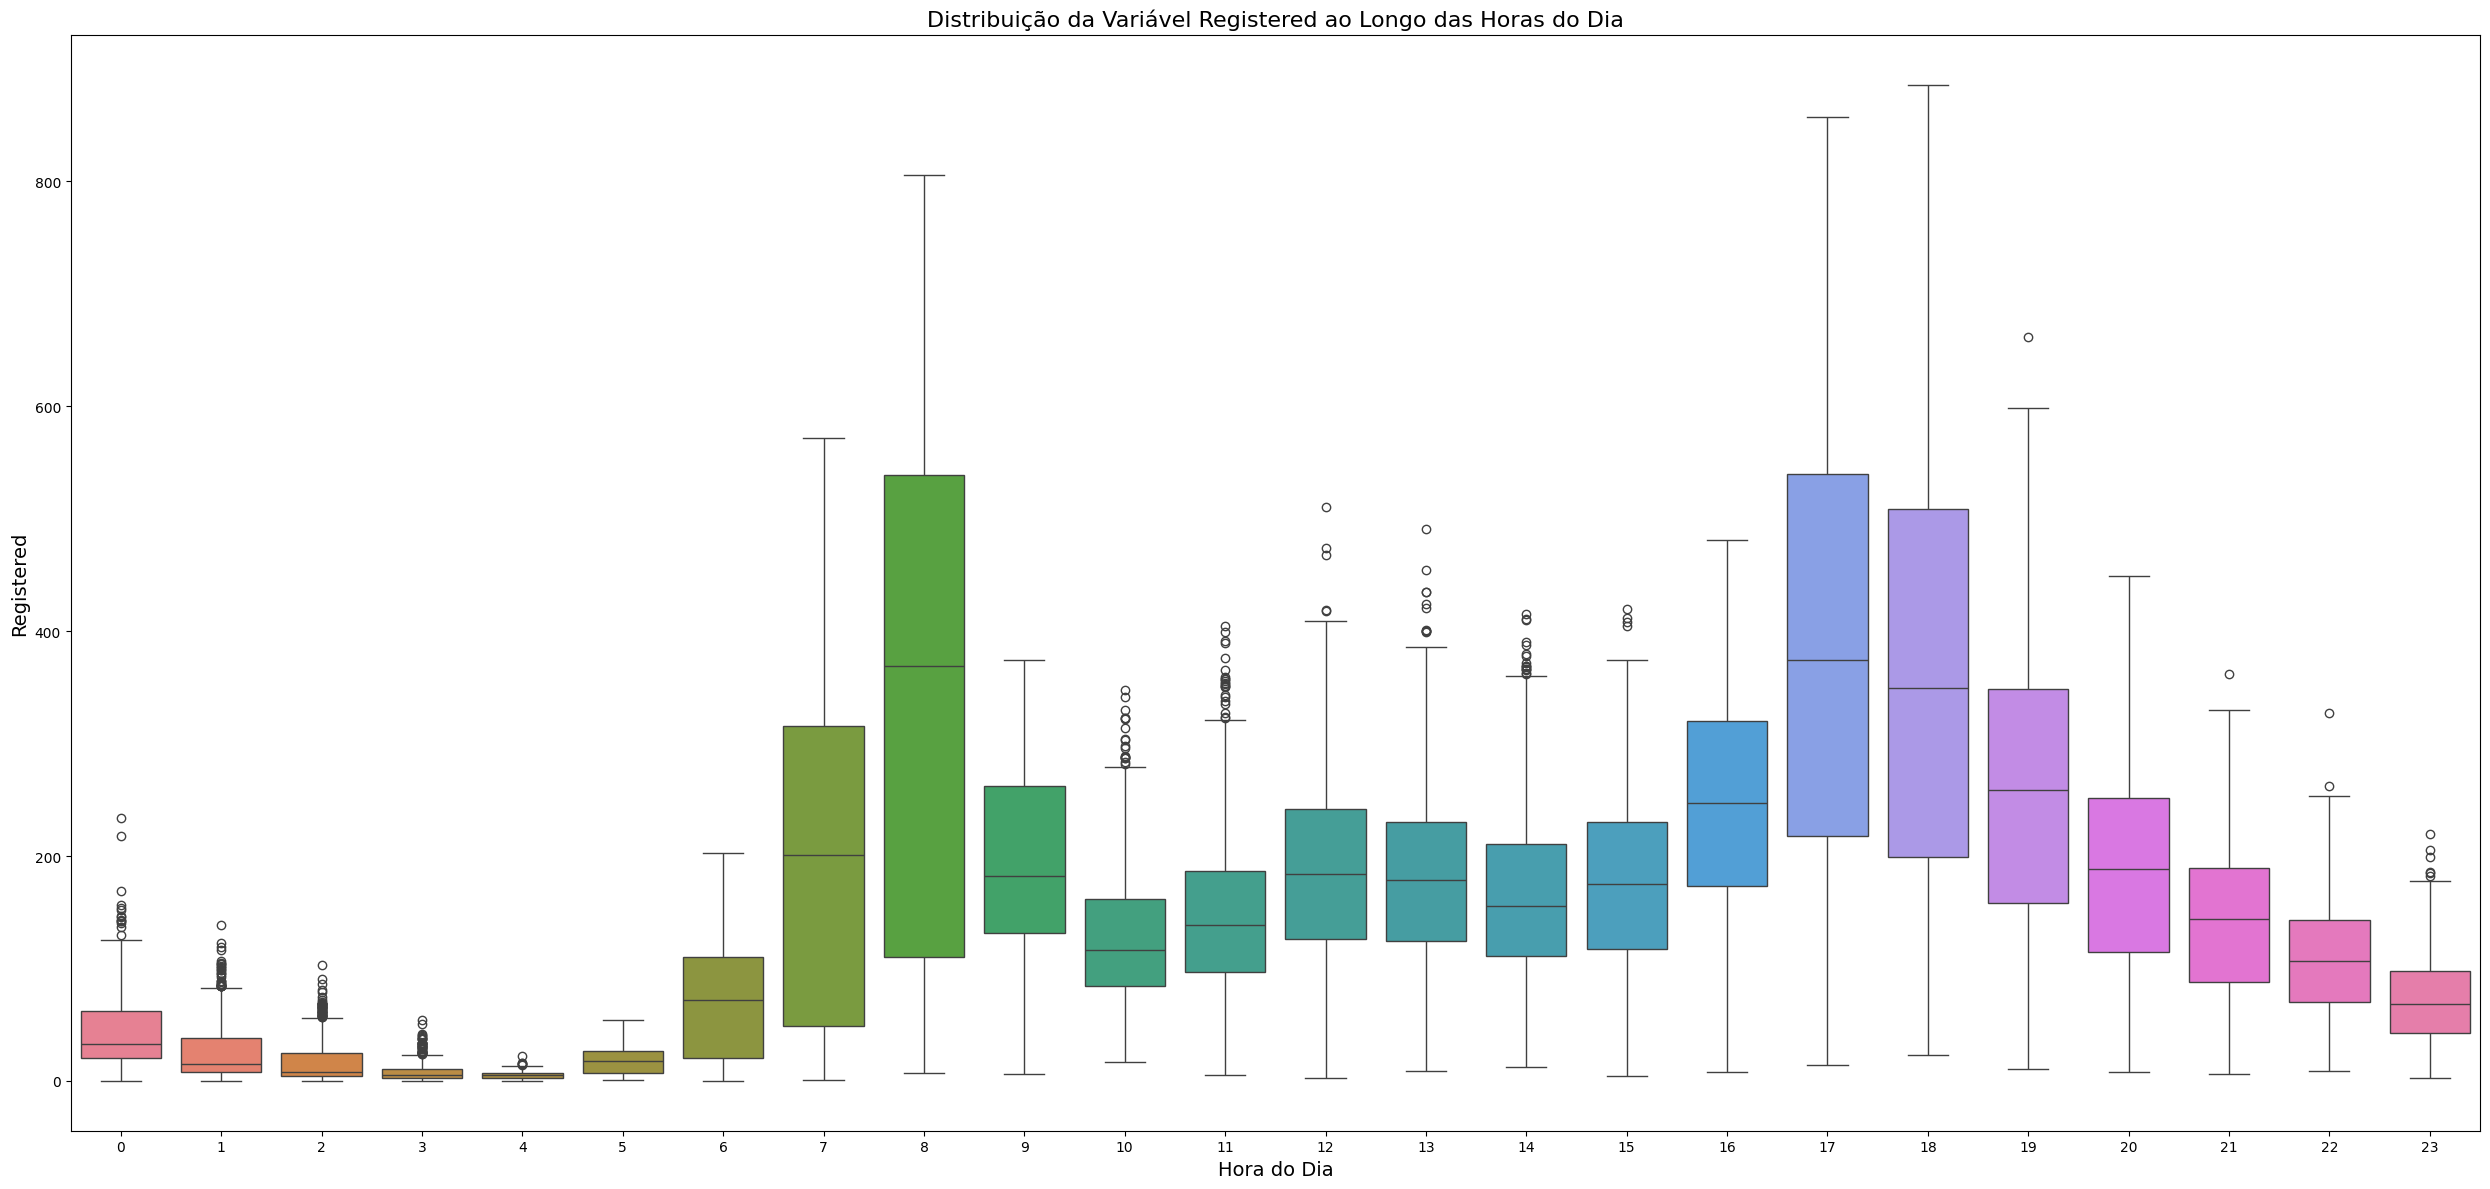

In [15]:
# Ajuste do tamanho da figura
plt.figure(figsize=(25, 12))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 24)

# Boxplot
sns.boxplot(x="hour", y="registered", data=train, hue="hour", palette=palette, legend=False)

# Título e rótulos dos eixos
plt.title('Distribuição da Variável Registered ao Longo das Horas do Dia', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Registered', fontsize=14)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

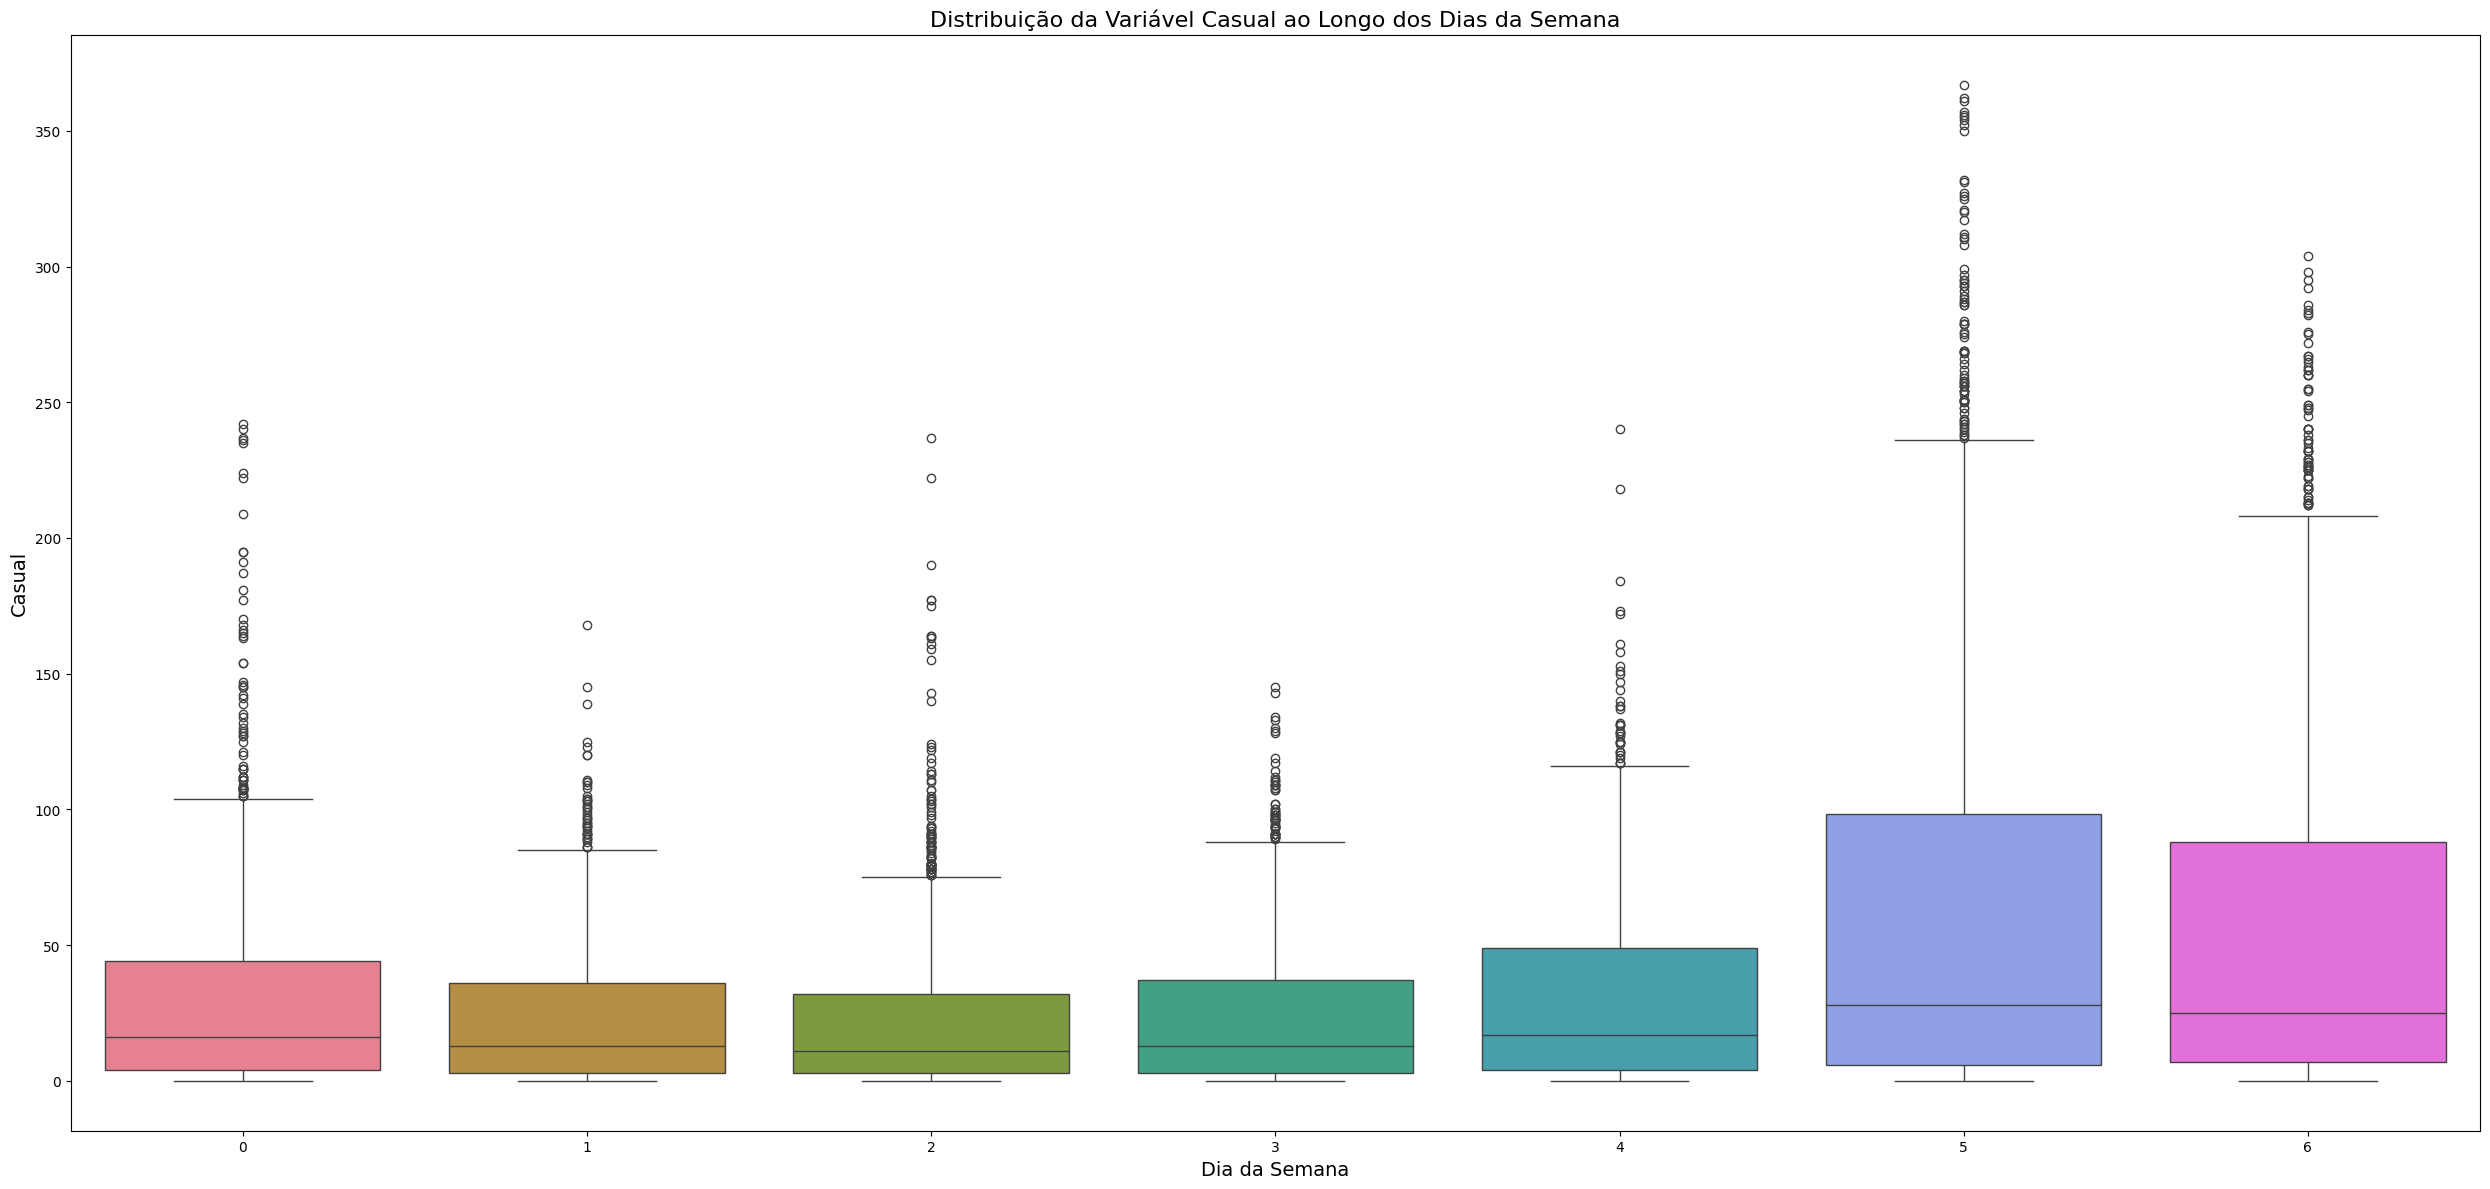

In [16]:
# Ajuste do tamanho da figura
plt.figure(figsize=(25, 12))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 7)

# Boxplot
sns.boxplot(x="day_of_week", y="casual", data=train, hue="day_of_week", palette=palette, legend=False)

# Título e rótulos dos eixos
plt.title('Distribuição da Variável Casual ao Longo dos Dias da Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=14)
plt.ylabel('Casual', fontsize=14)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

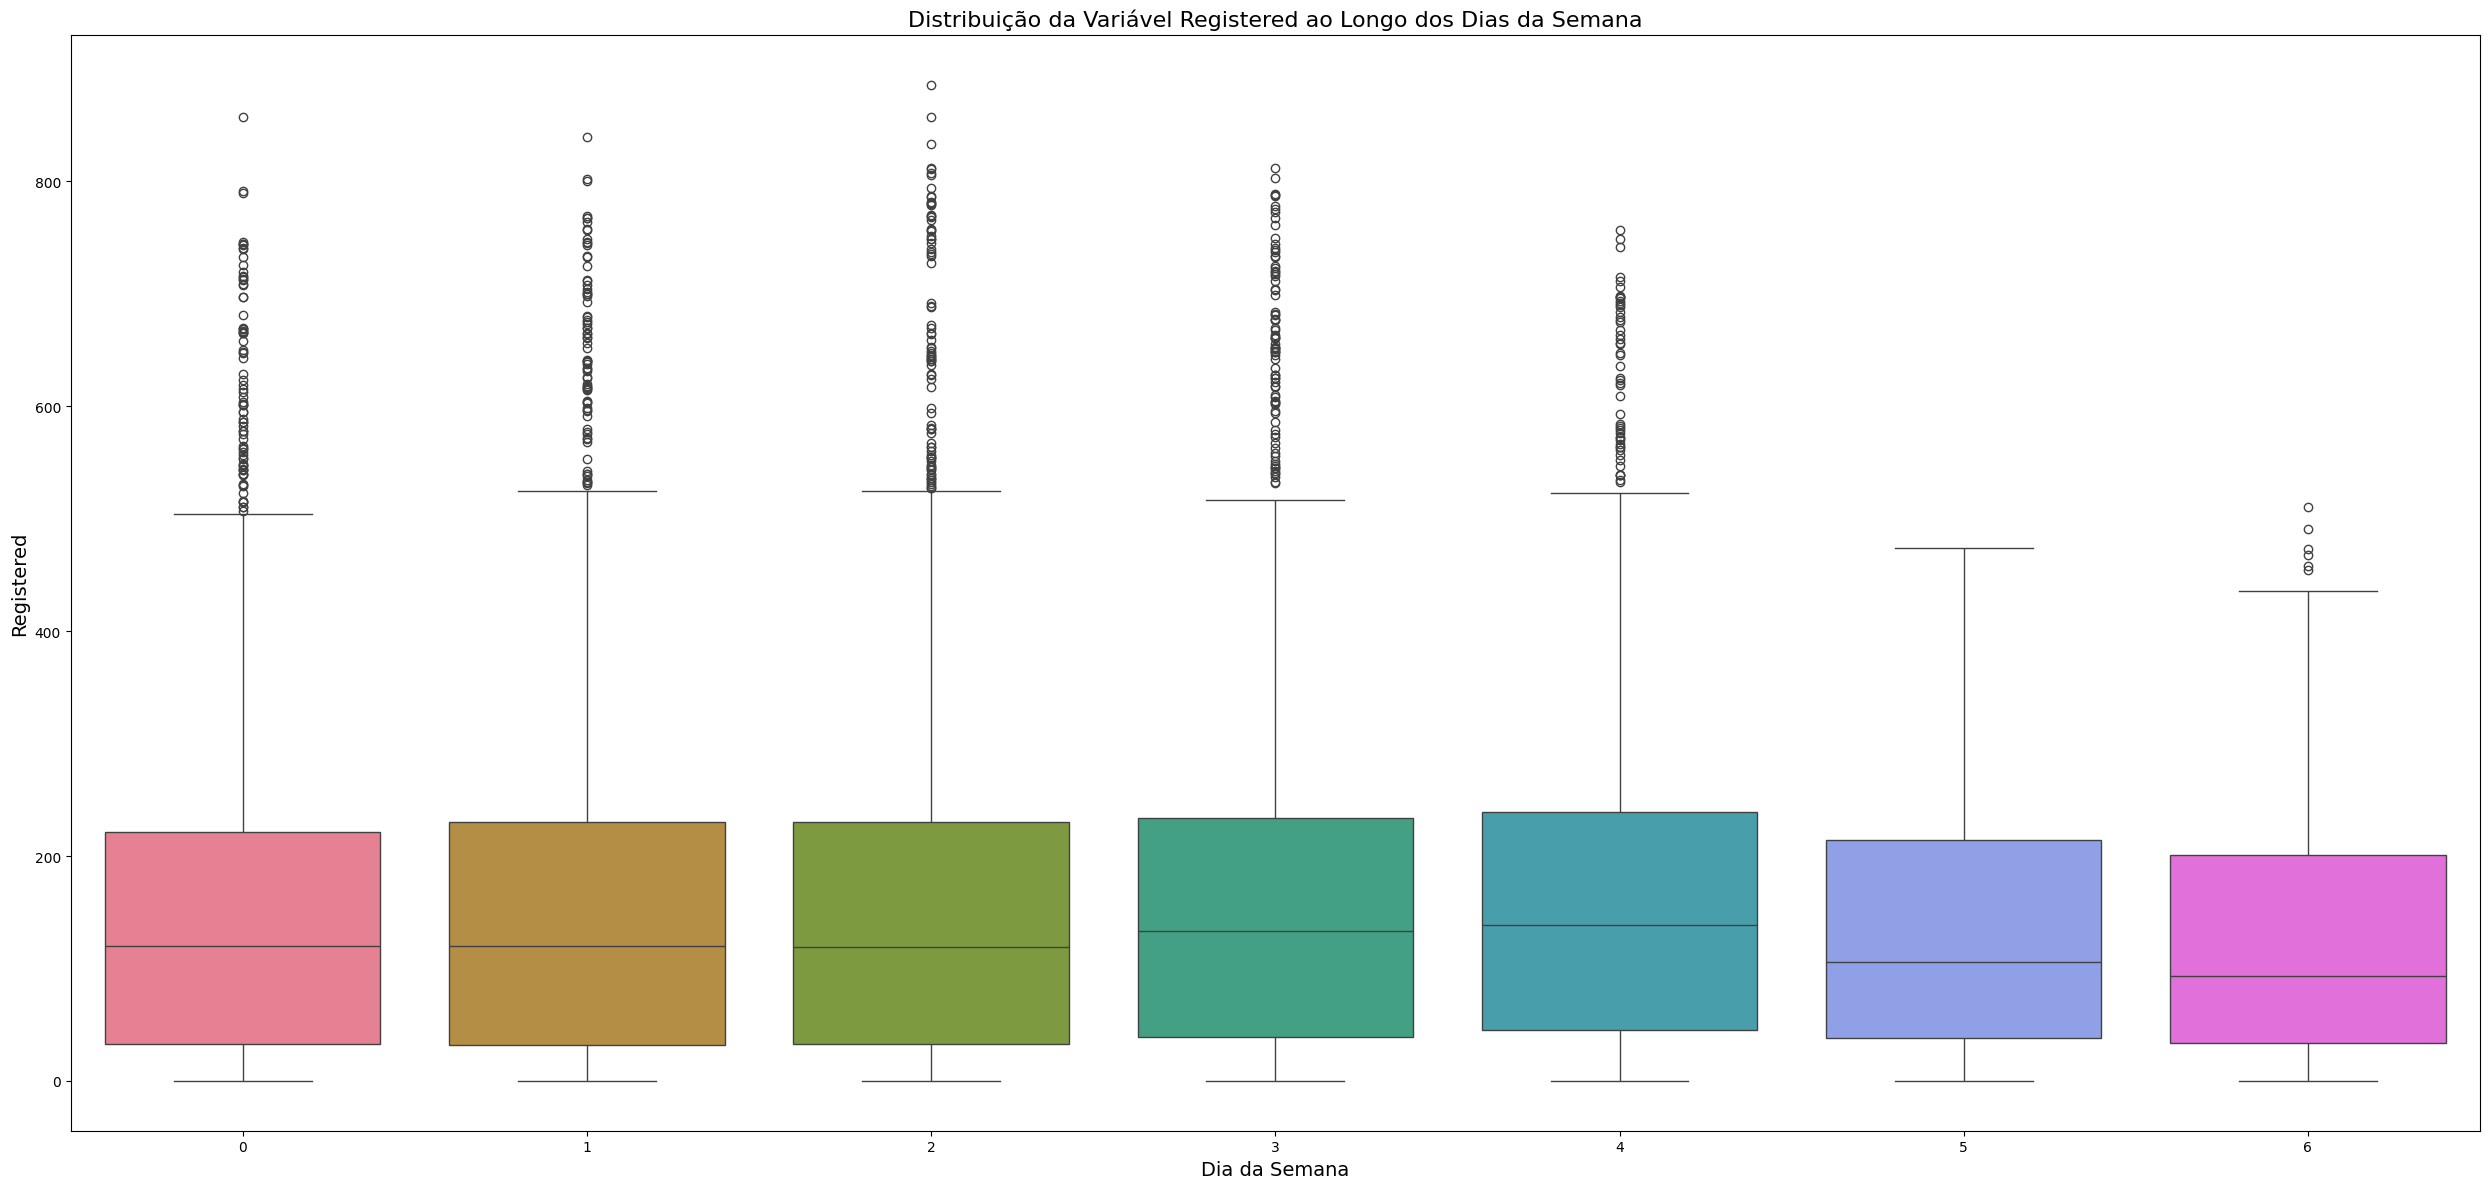

In [17]:
# Ajuste do tamanho da figura
plt.figure(figsize=(25, 12))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 7)

# Boxplot
sns.boxplot(x="day_of_week", y="registered", data=train, hue="day_of_week", palette=palette, legend=False)

# Título e rótulos dos eixos
plt.title('Distribuição da Variável Registered ao Longo dos Dias da Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=14)
plt.ylabel('Registered', fontsize=14)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

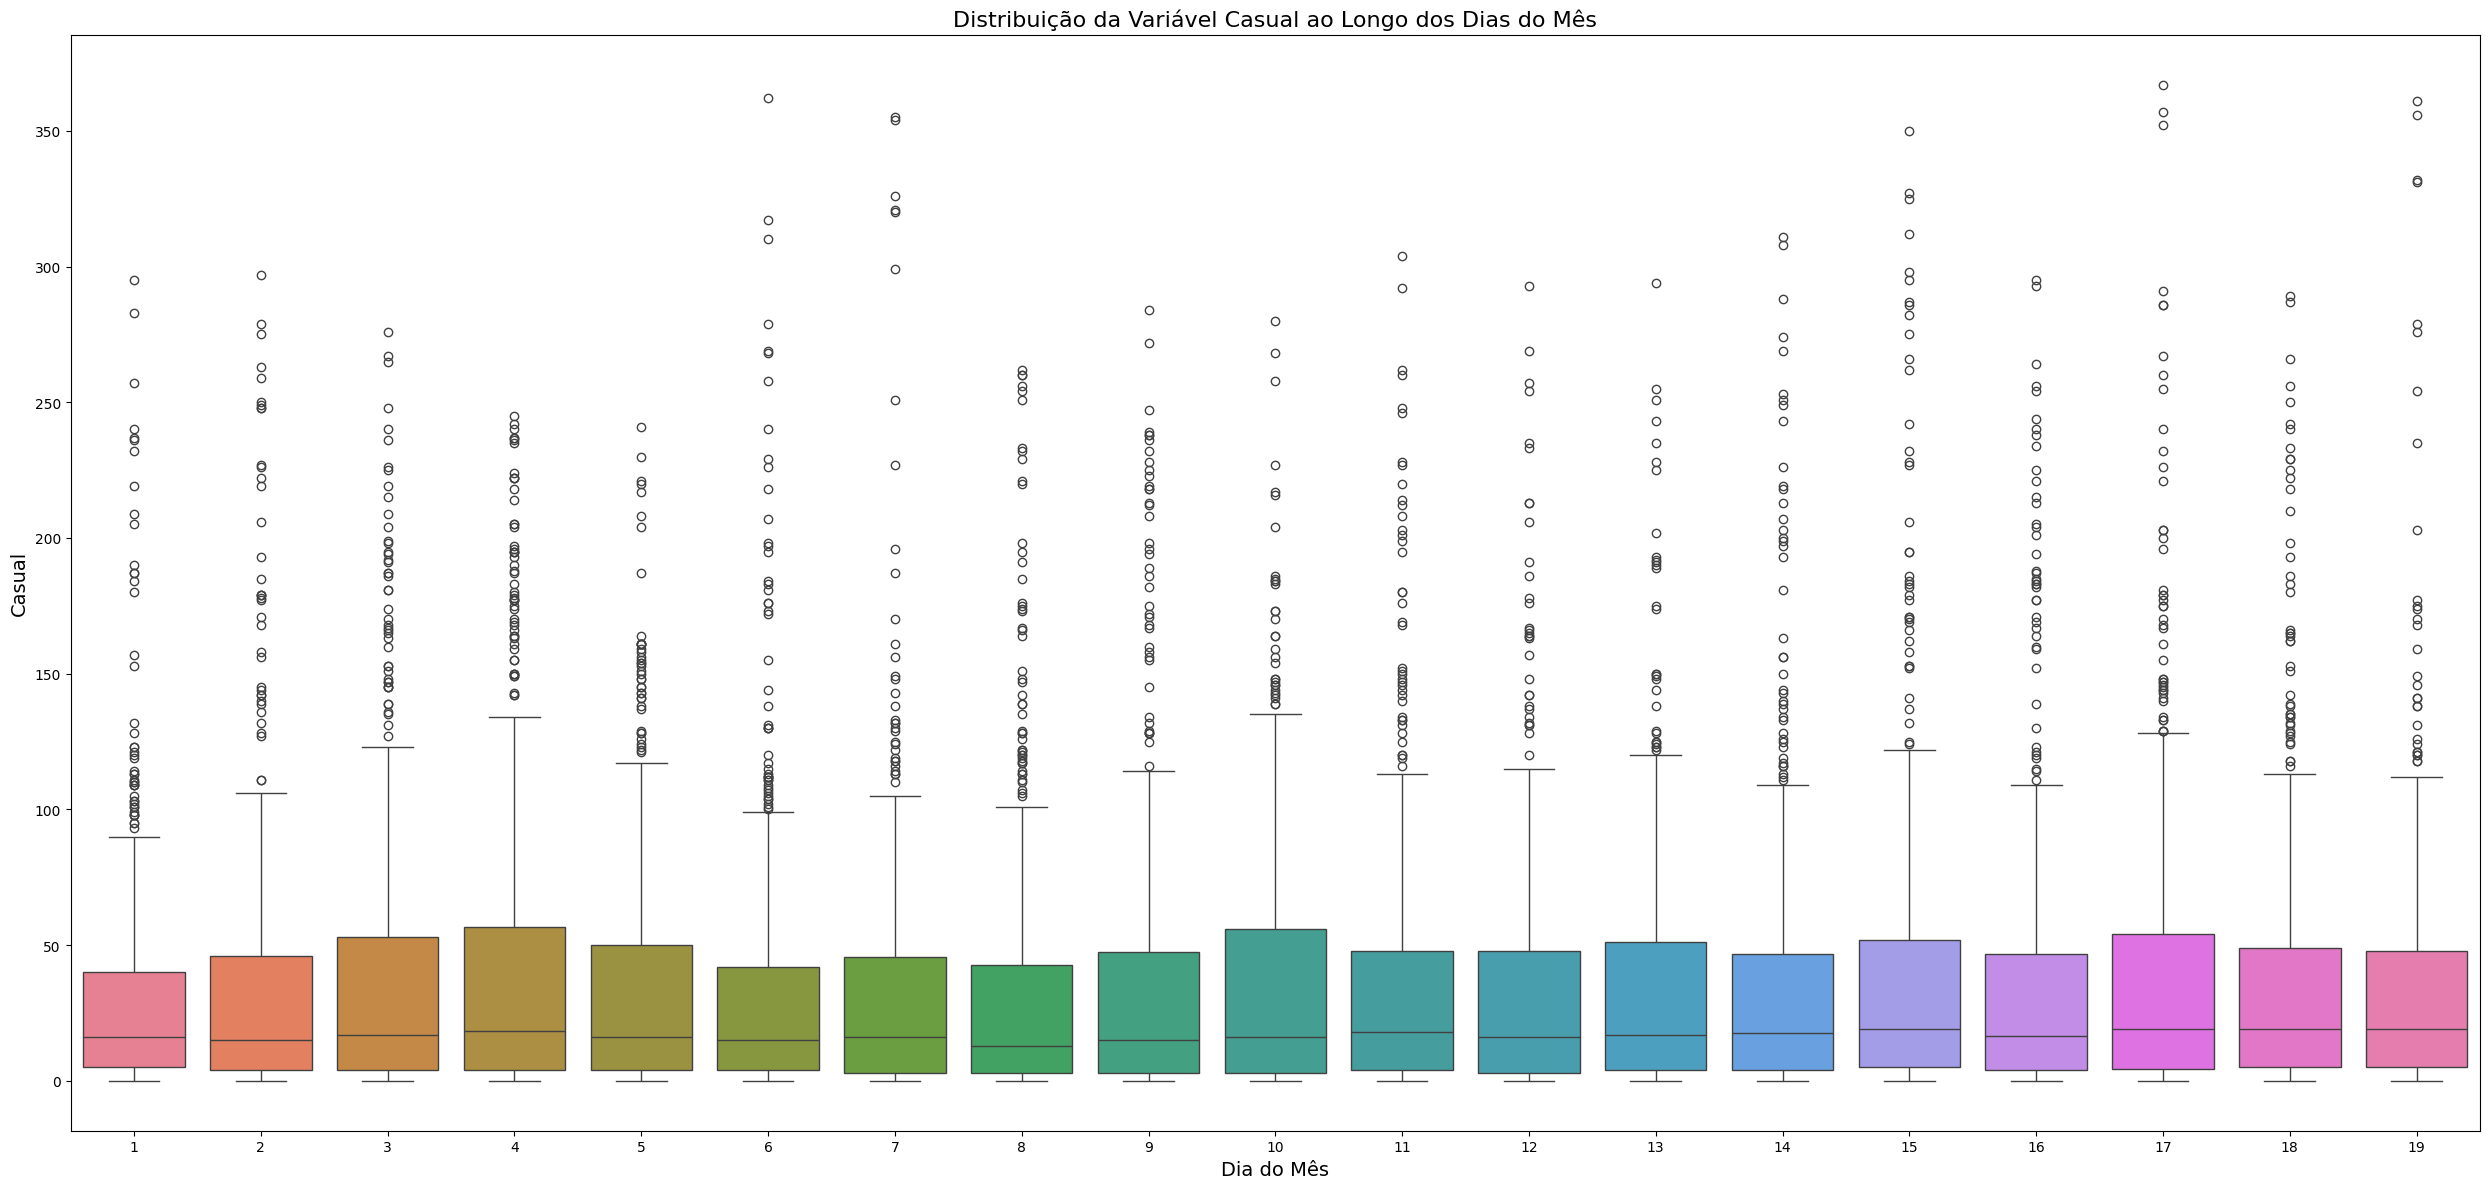

In [18]:
# Ajuste do tamanho da figura
plt.figure(figsize=(25, 12))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 19)

# Boxplot
sns.boxplot(x="day", y="casual", data=train, hue="day", palette=palette, legend=False)

# Título e rótulos dos eixos
plt.title('Distribuição da Variável Casual ao Longo dos Dias do Mês', fontsize=16)
plt.xlabel('Dia do Mês', fontsize=14)
plt.ylabel('Casual', fontsize=14)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

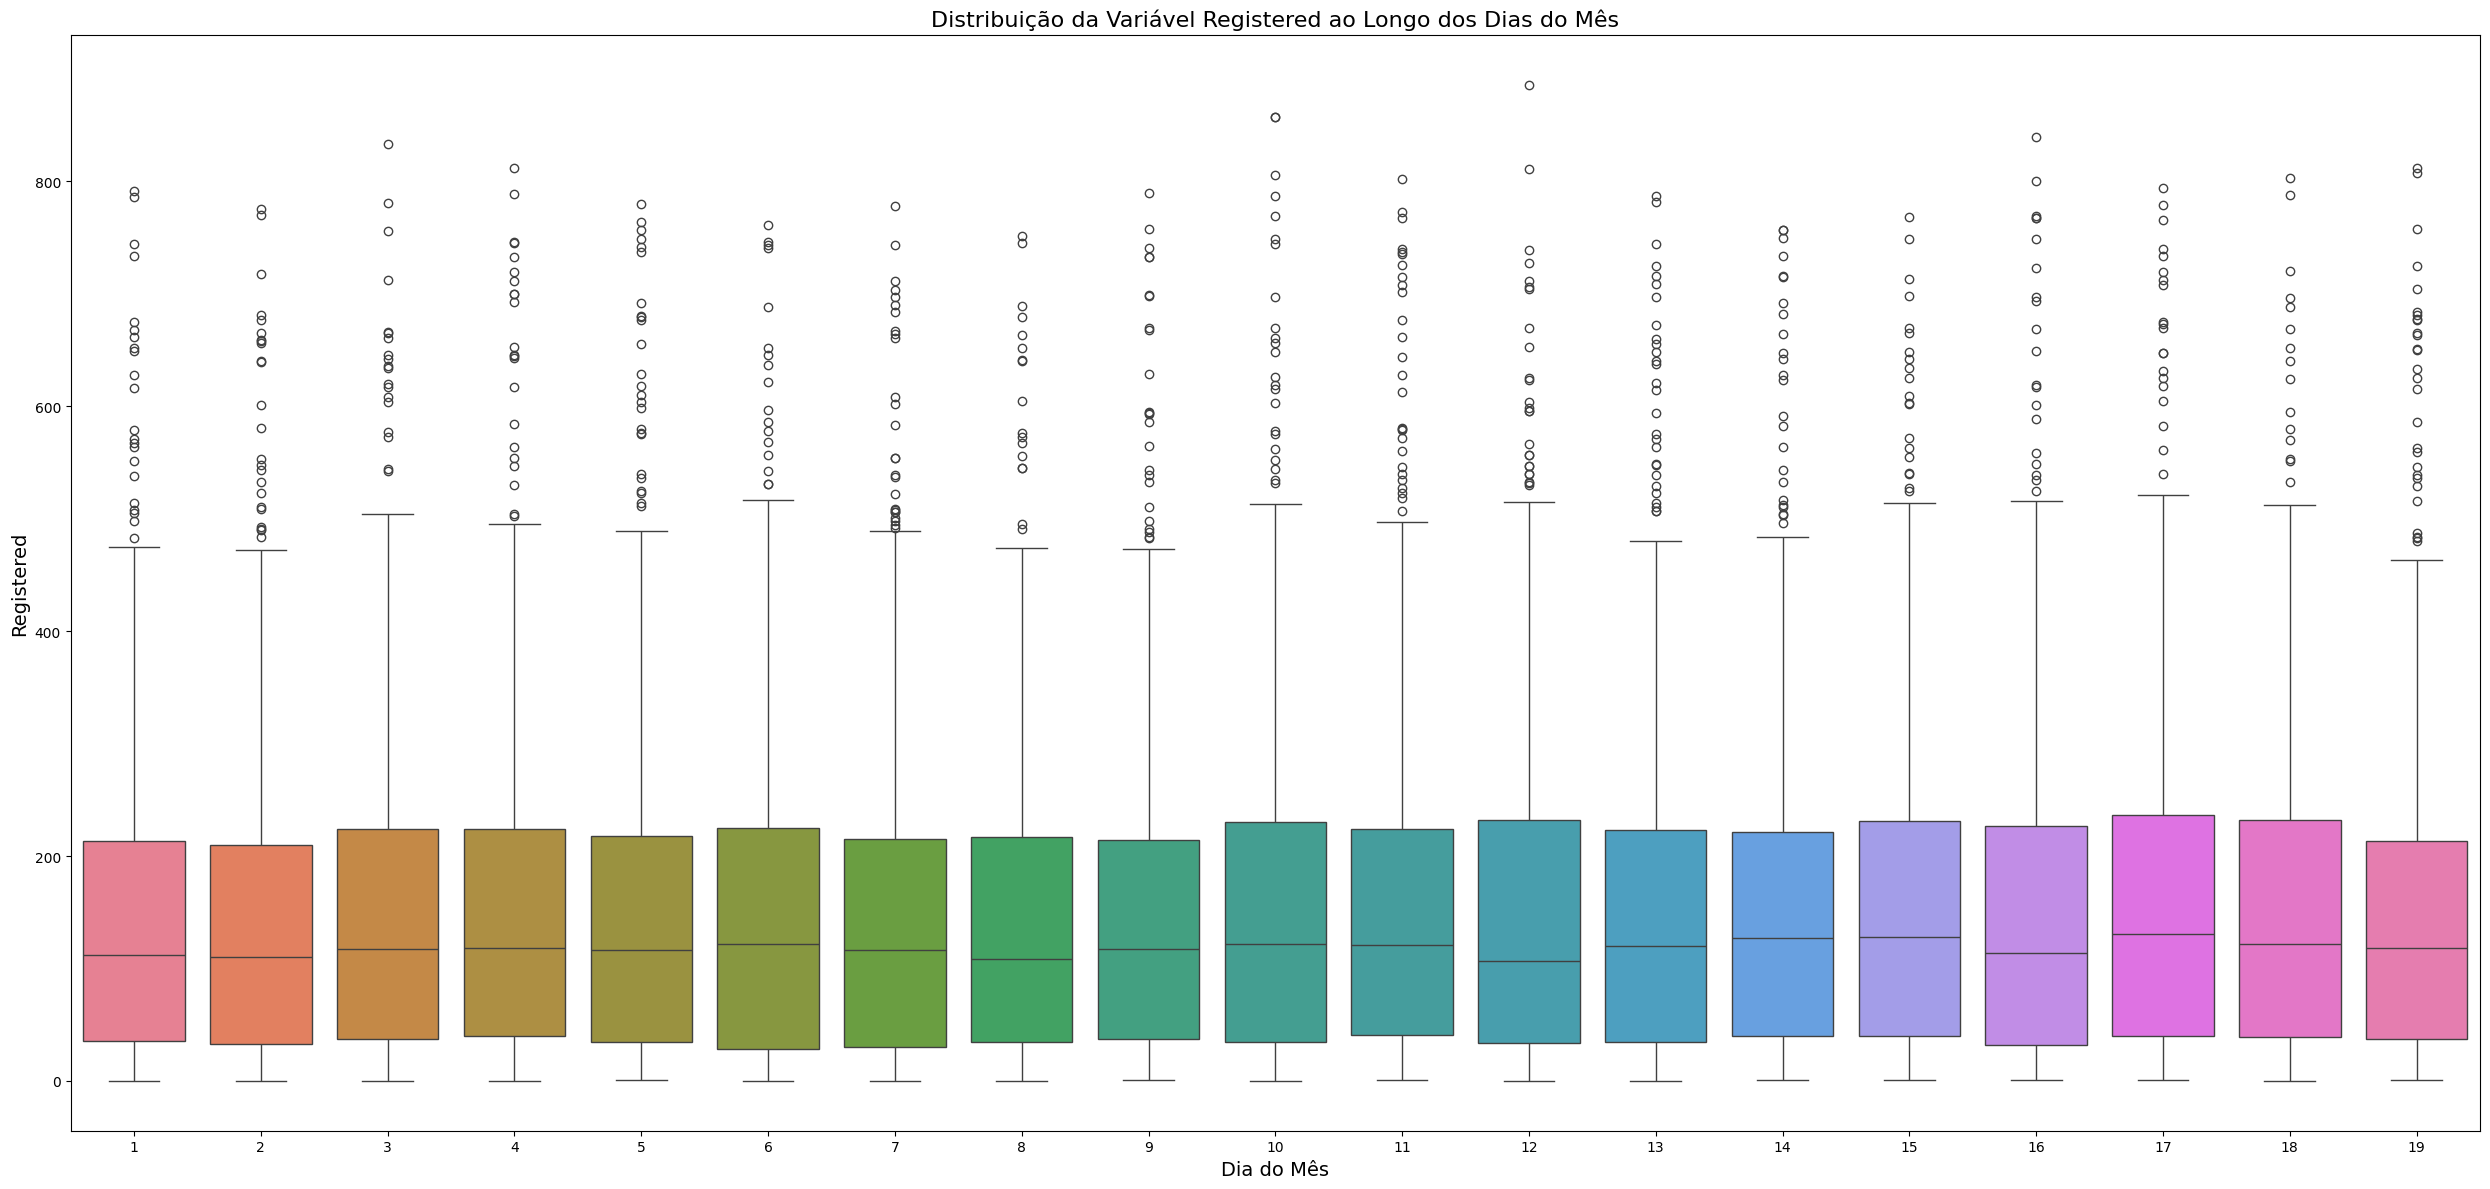

In [19]:
# Ajuste do tamanho da figura
plt.figure(figsize=(25, 12))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 19)

# Boxplot
sns.boxplot(x="day", y="registered", data=train, hue="day", palette=palette, legend=False)

# Título e rótulos dos eixos
plt.title('Distribuição da Variável Registered ao Longo dos Dias do Mês', fontsize=16)
plt.xlabel('Dia do Mês', fontsize=14)
plt.ylabel('Registered', fontsize=14)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

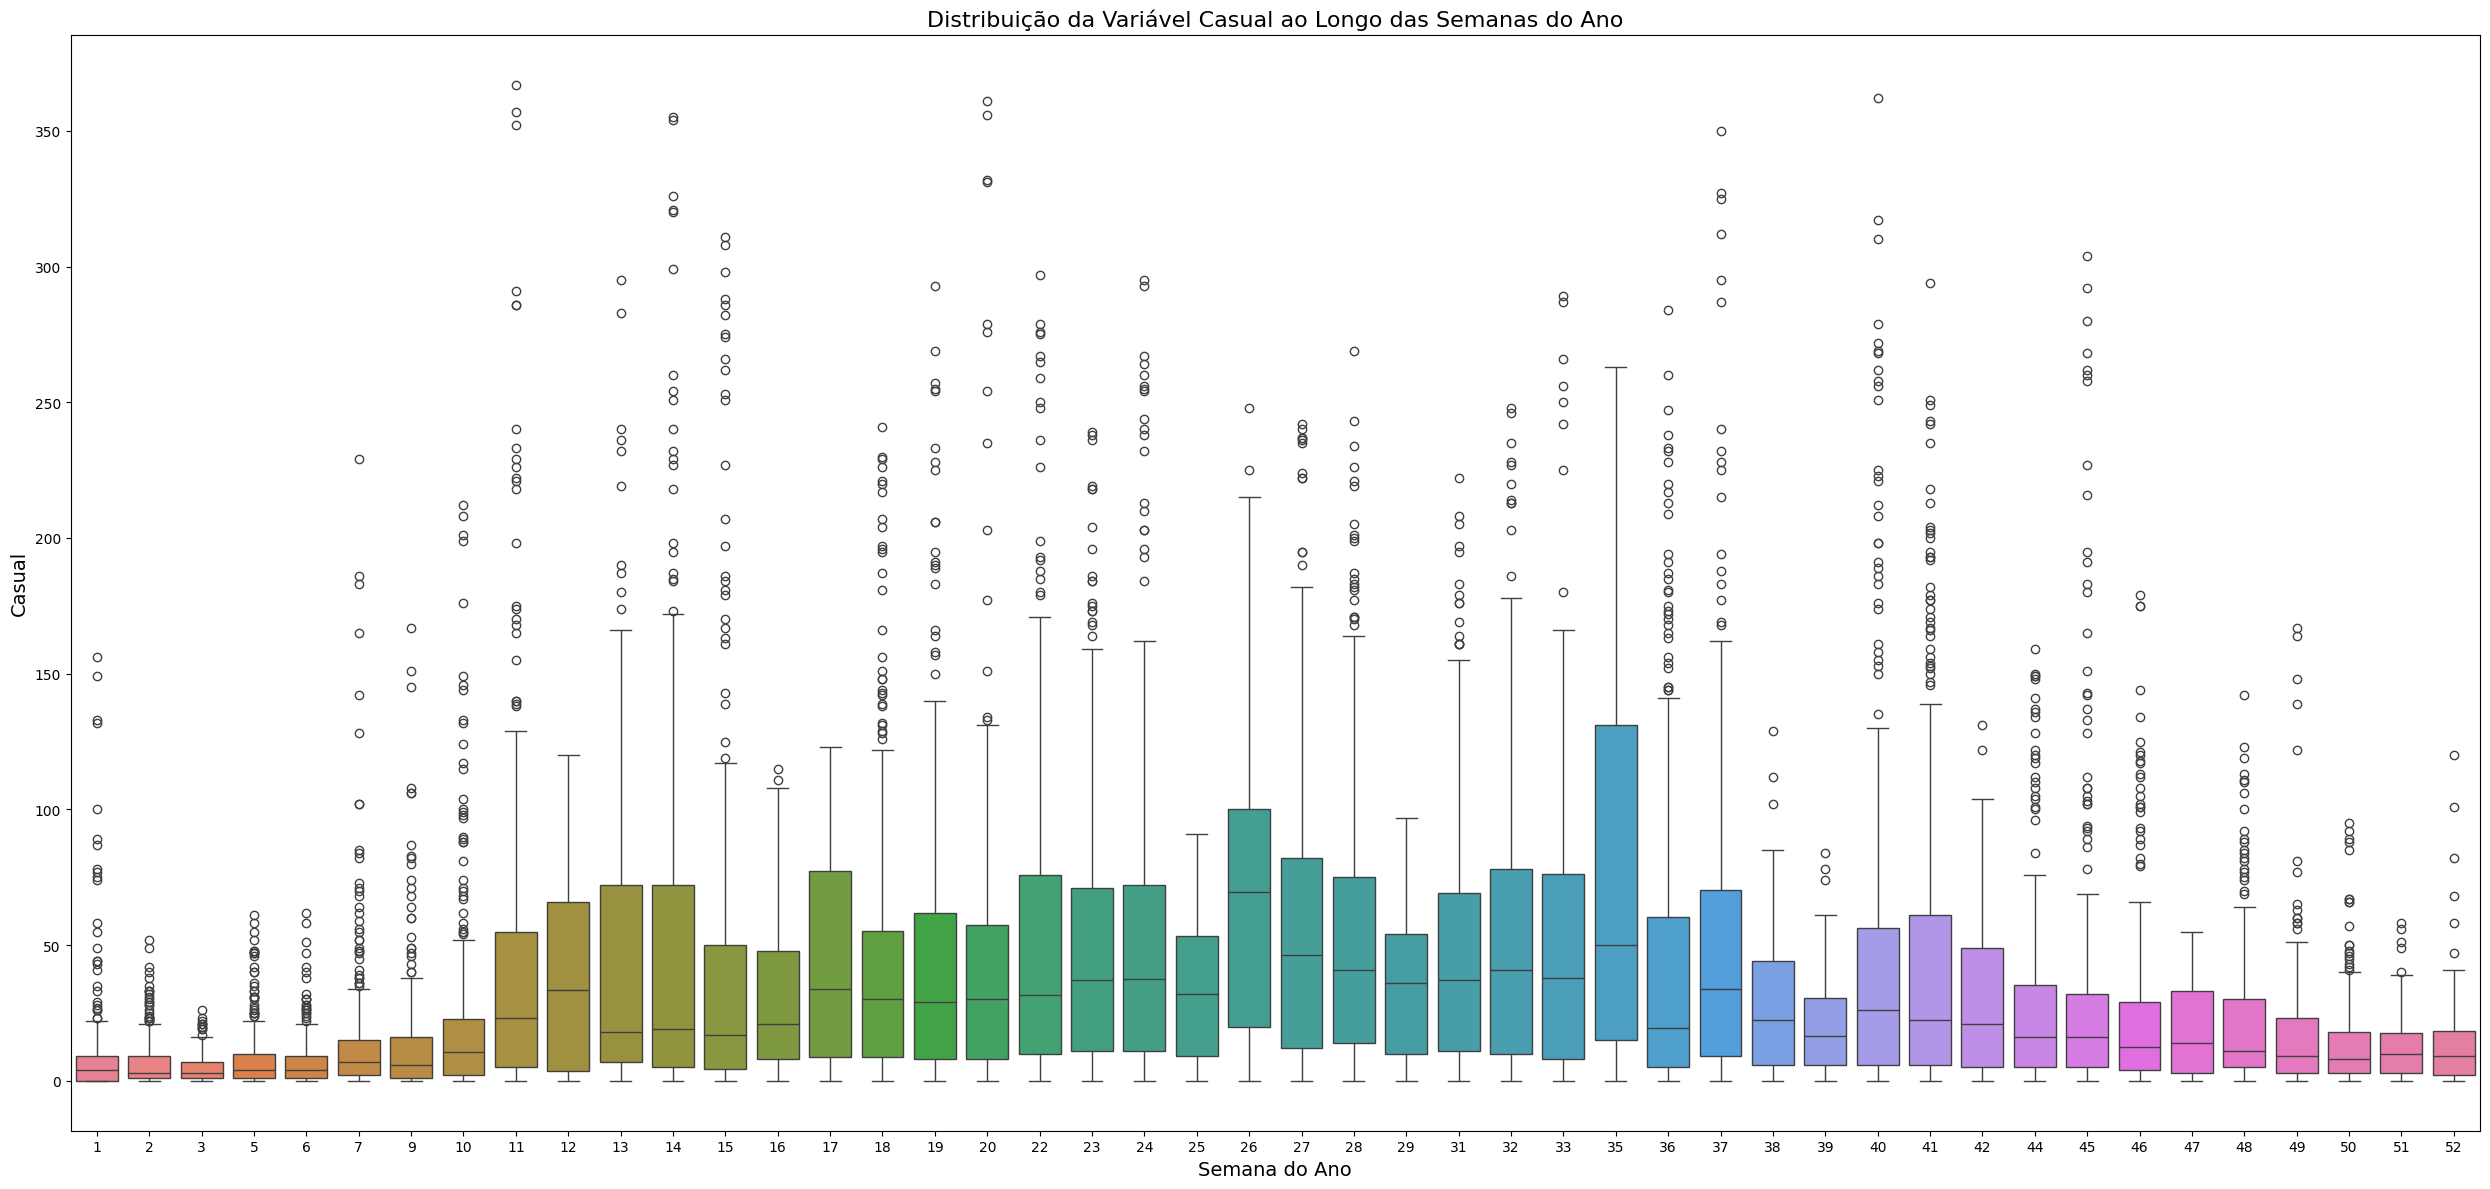

In [20]:
# Ajuste do tamanho da figura
plt.figure(figsize=(25, 12))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 46)

# Boxplot
sns.boxplot(x="week_of_year", y="casual", data=train, hue="week_of_year", palette=palette, legend=False)

# Título e rótulos dos eixos
plt.title('Distribuição da Variável Casual ao Longo das Semanas do Ano', fontsize=16)
plt.xlabel('Semana do Ano', fontsize=14)
plt.ylabel('Casual', fontsize=14)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

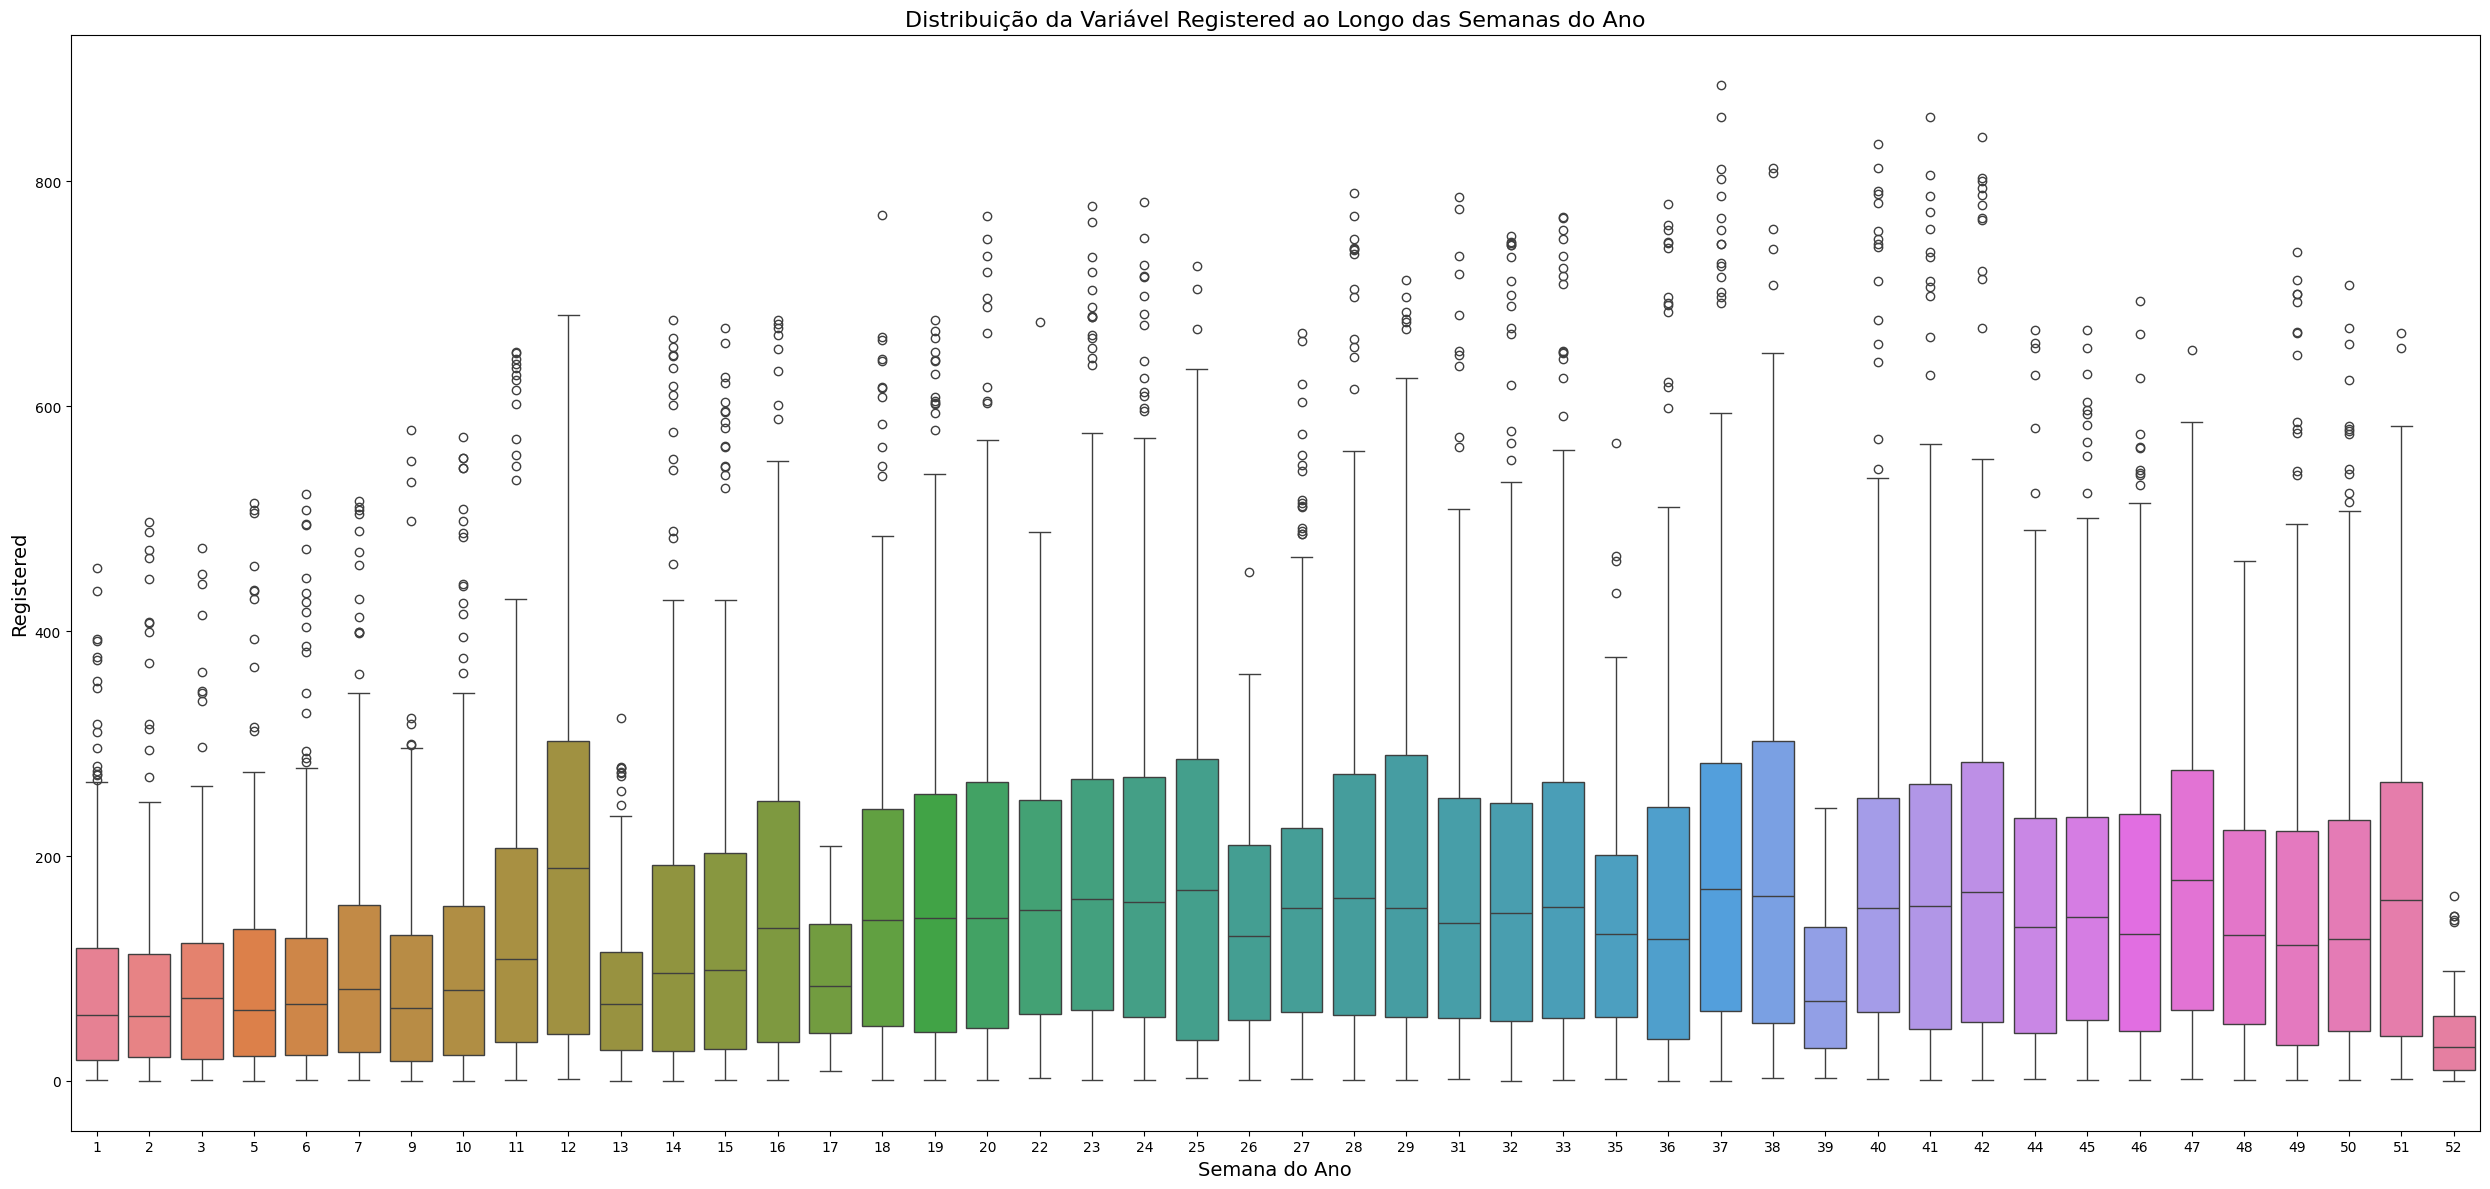

In [21]:
# Ajuste do tamanho da figura
plt.figure(figsize=(25, 12))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 46)

# Boxplot
sns.boxplot(x="week_of_year", y="registered", data=train, hue="week_of_year", palette=palette, legend=False)

# Título e rótulos dos eixos
plt.title('Distribuição da Variável Registered ao Longo das Semanas do Ano', fontsize=16)
plt.xlabel('Semana do Ano', fontsize=14)
plt.ylabel('Registered', fontsize=14)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

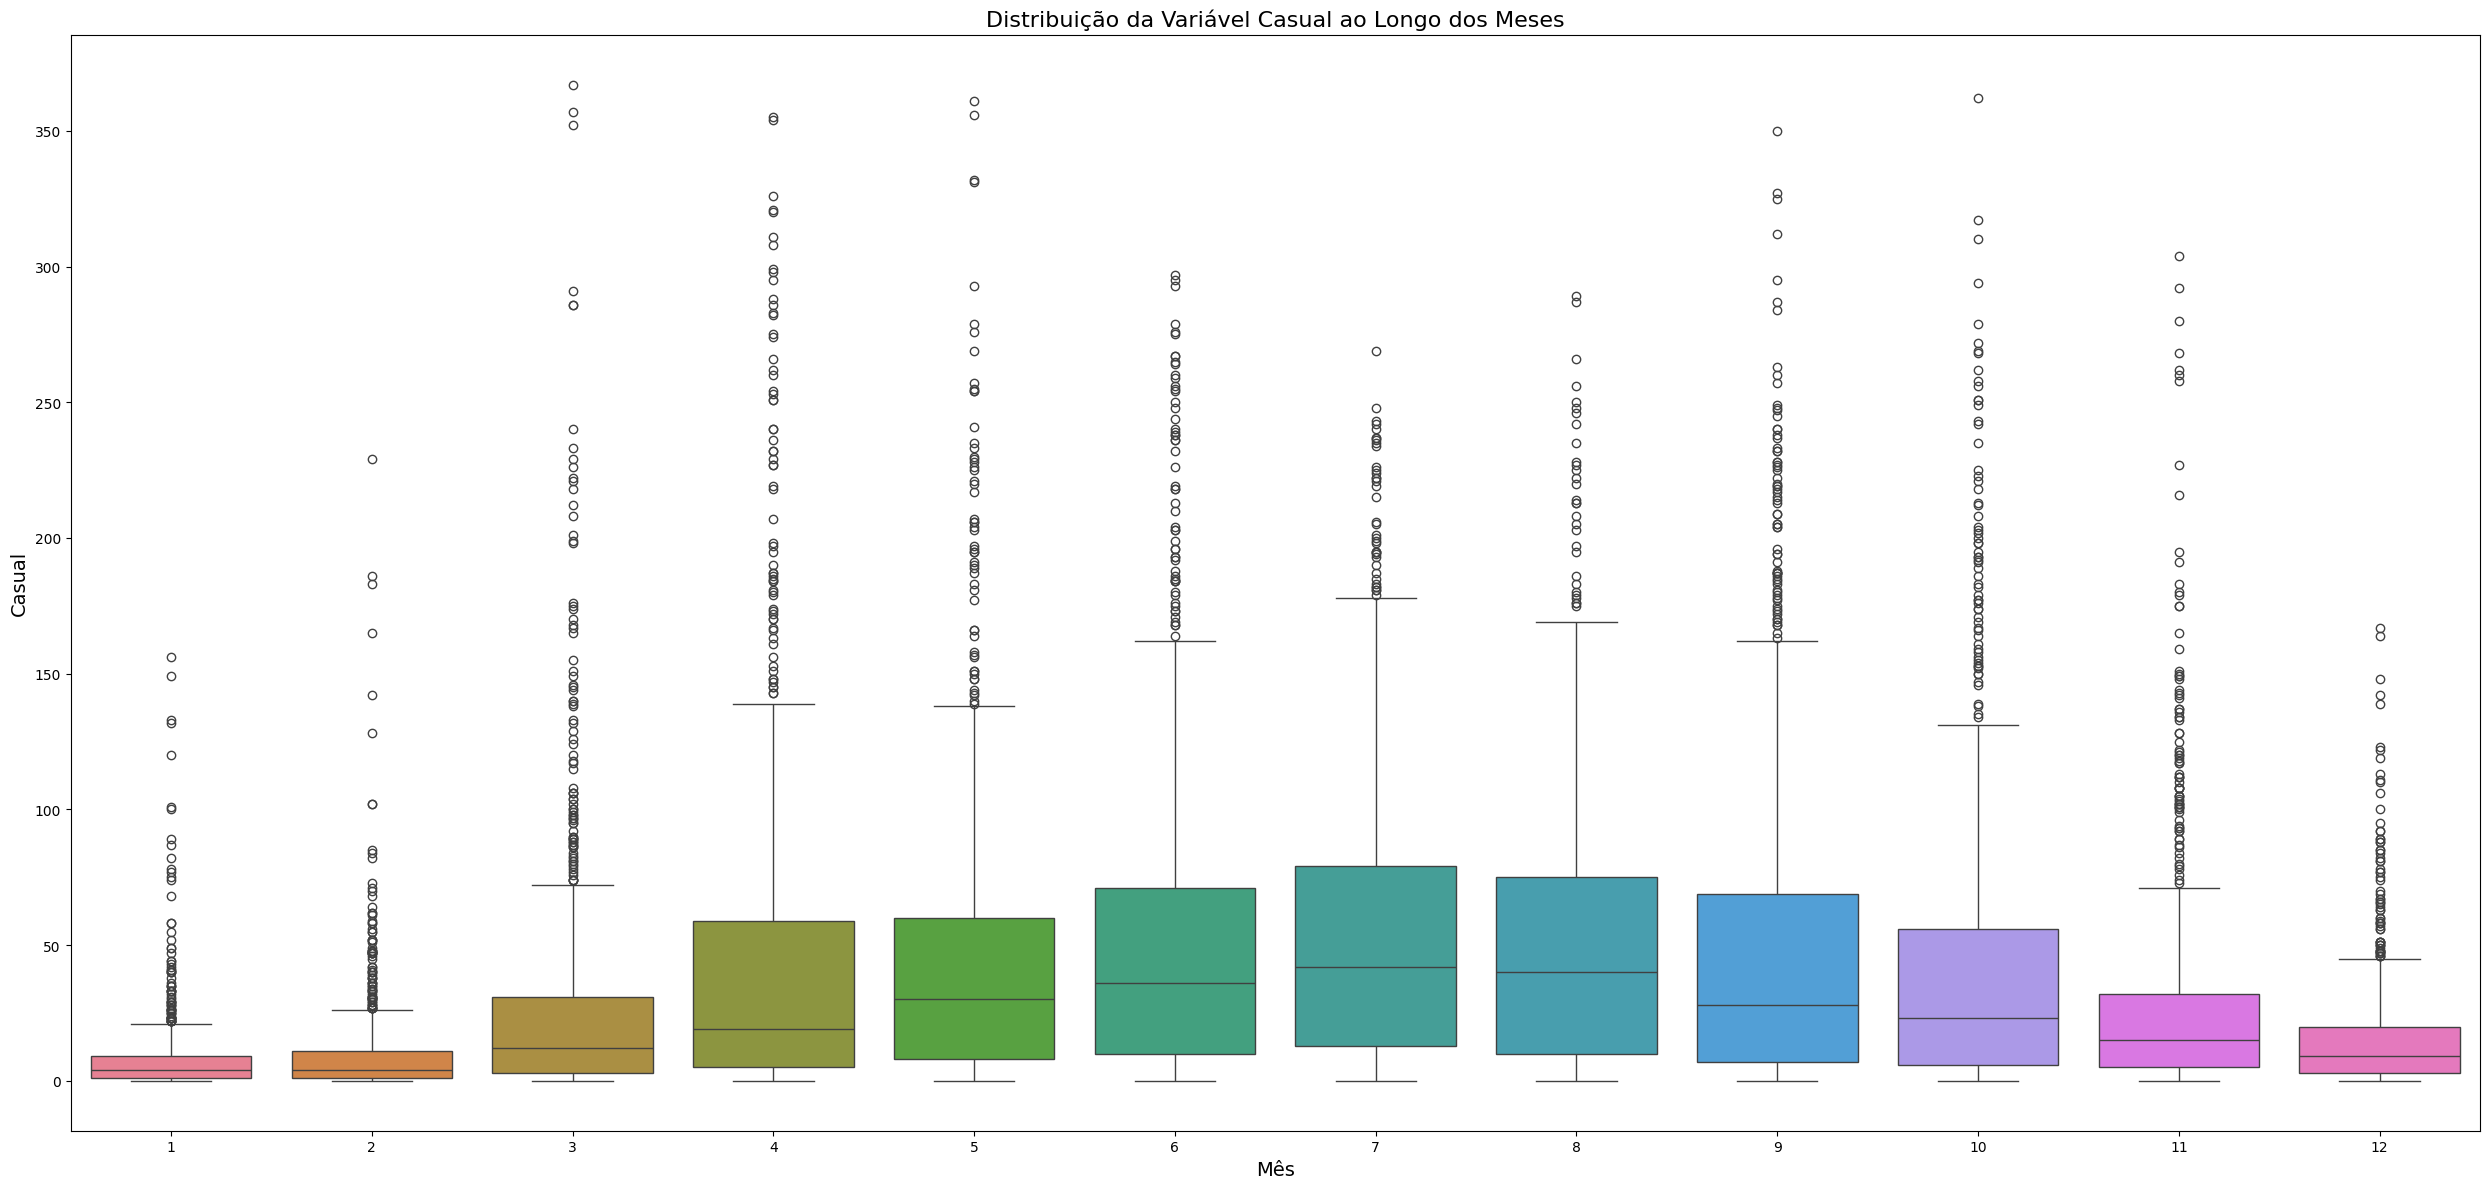

In [22]:
# Ajuste do tamanho da figura
plt.figure(figsize=(25, 12))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 12)

# Boxplot
sns.boxplot(x="month", y="casual", data=train, hue="month", palette=palette, legend=False)

# Título e rótulos dos eixos
plt.title('Distribuição da Variável Casual ao Longo dos Meses', fontsize=16)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Casual', fontsize=14)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

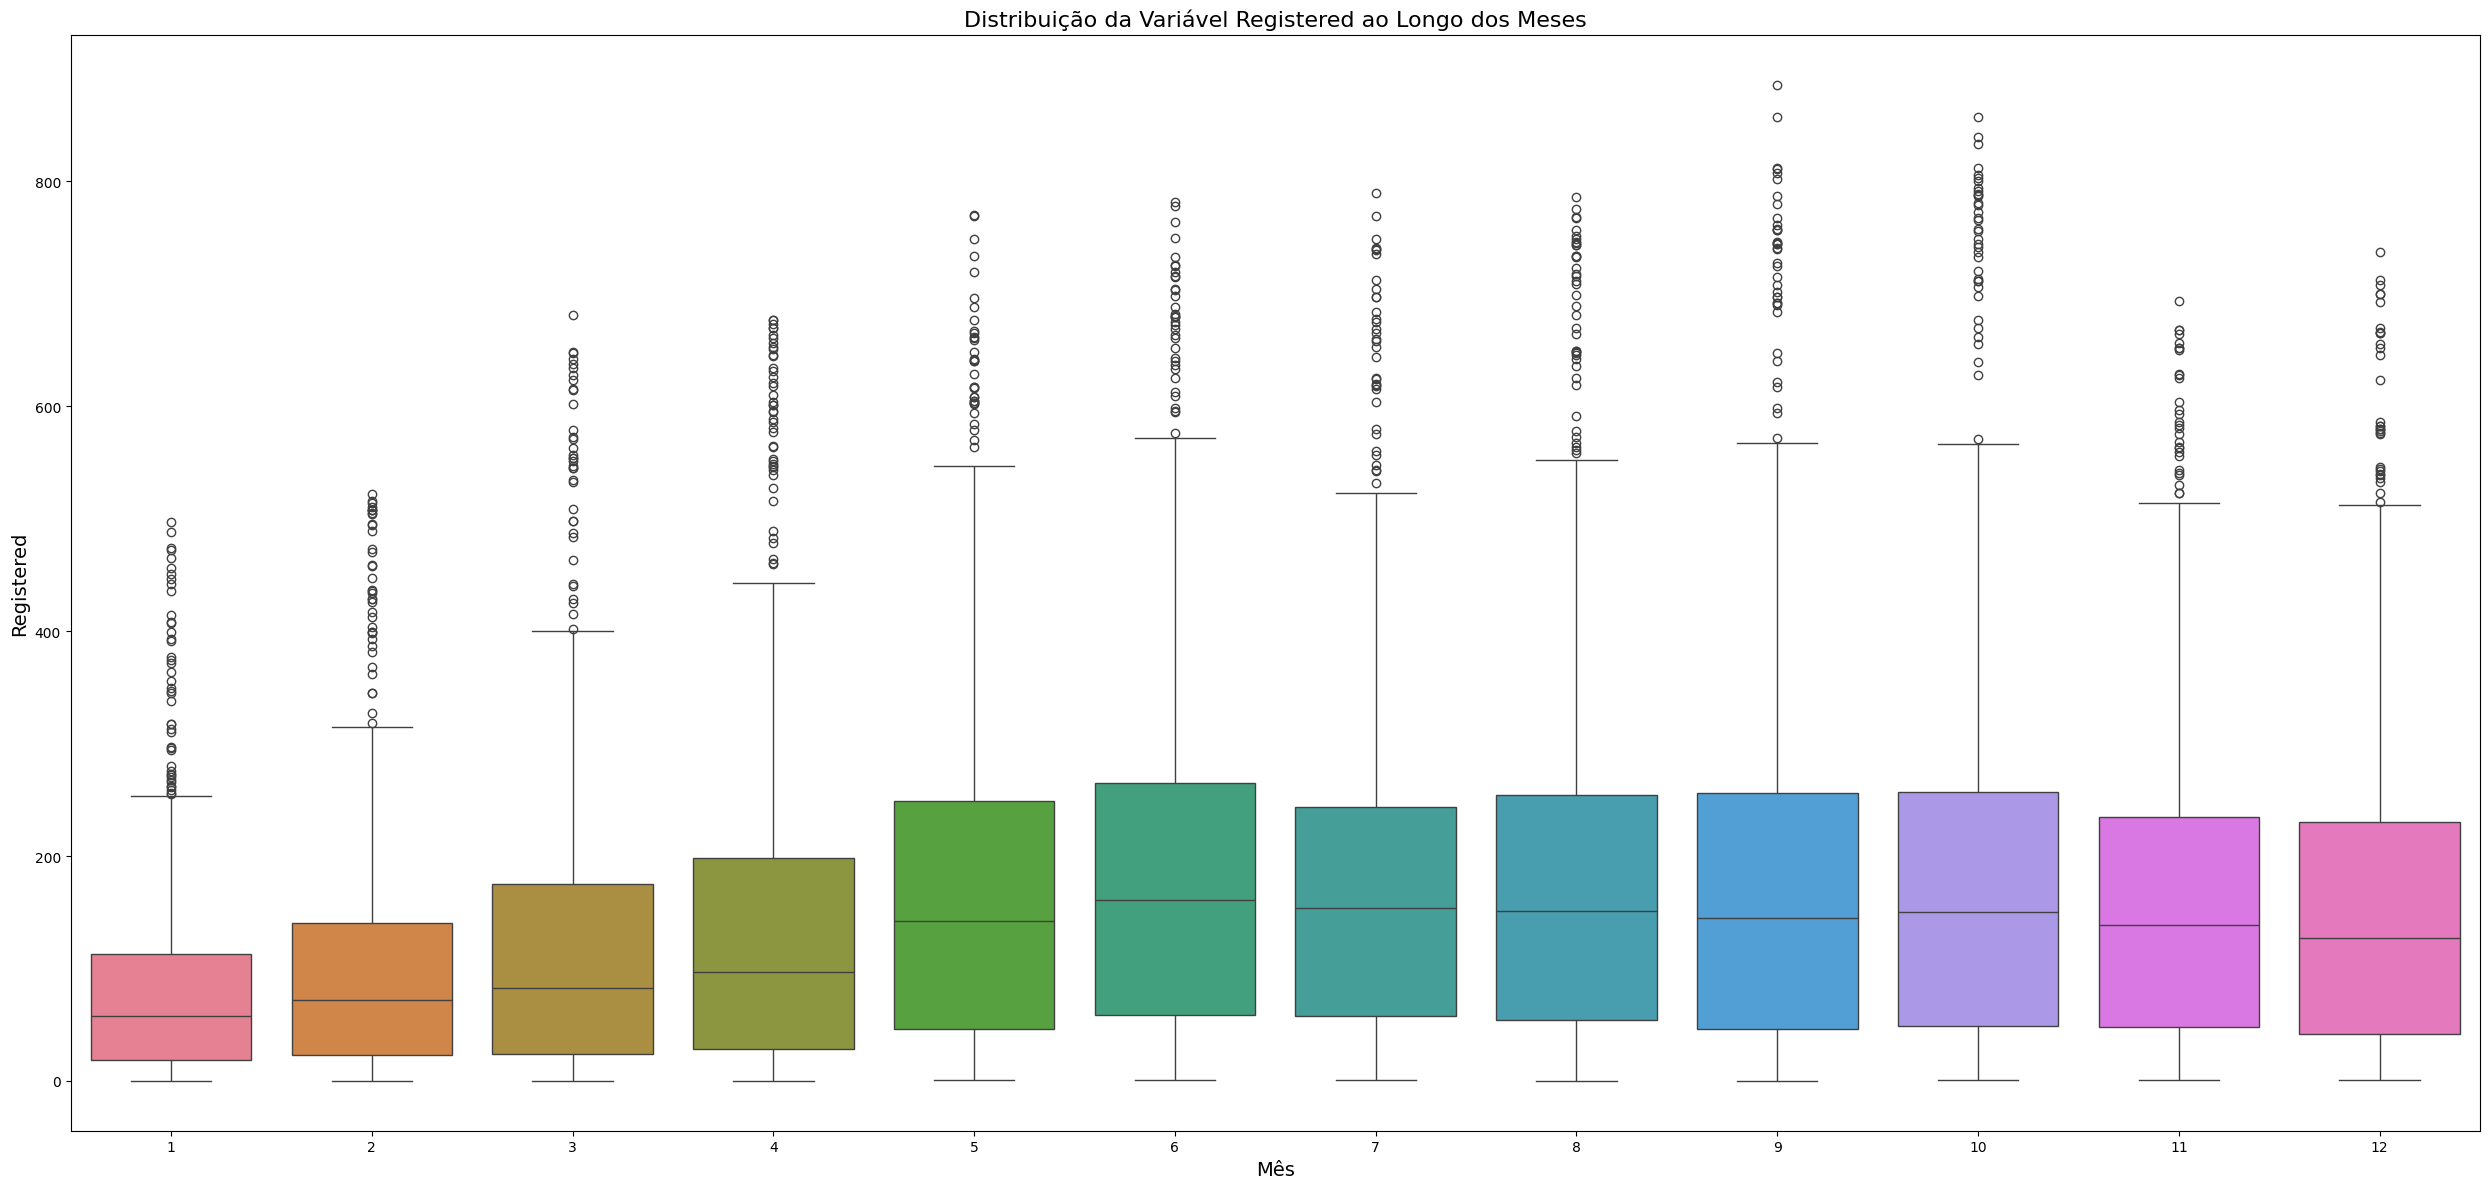

In [23]:
# Ajuste do tamanho da figura
plt.figure(figsize=(25, 12))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 12)

# Boxplot
sns.boxplot(x="month", y="registered", data=train, hue="month", palette=palette, legend=False)

# Título e rótulos dos eixos
plt.title('Distribuição da Variável Registered ao Longo dos Meses', fontsize=16)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Registered', fontsize=14)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

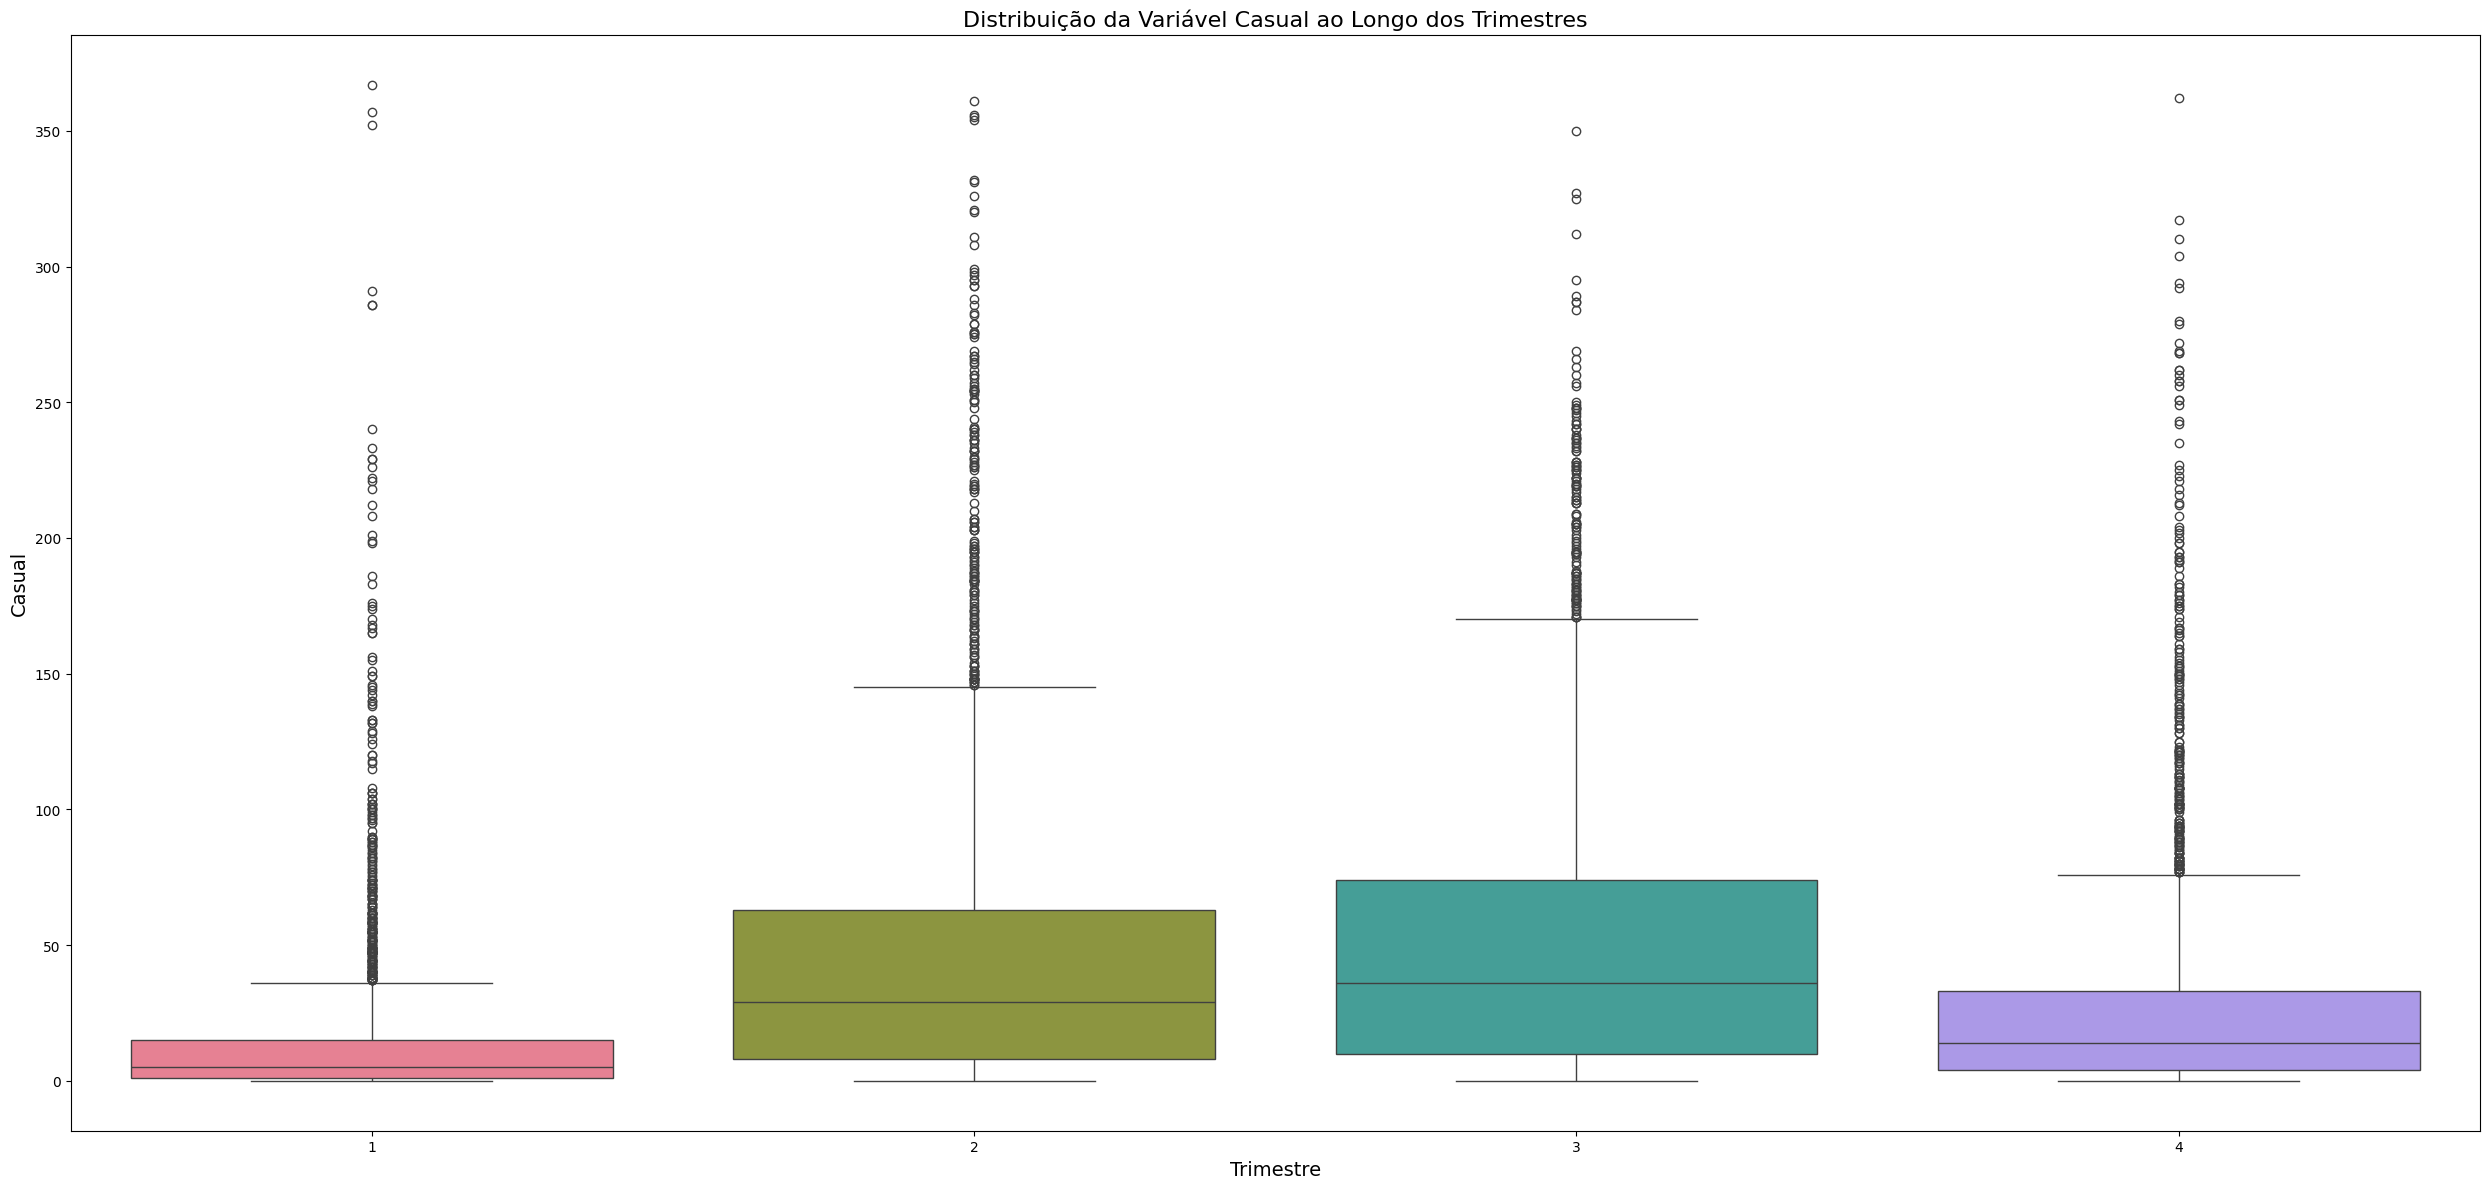

In [24]:
# Ajuste do tamanho da figura
plt.figure(figsize=(25, 12))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 4)

# Boxplot
sns.boxplot(x="quarter", y="casual", data=train, hue="quarter", palette=palette, legend=False)

# Título e rótulos dos eixos
plt.title('Distribuição da Variável Casual ao Longo dos Trimestres', fontsize=16)
plt.xlabel('Trimestre', fontsize=14)
plt.ylabel('Casual', fontsize=14)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

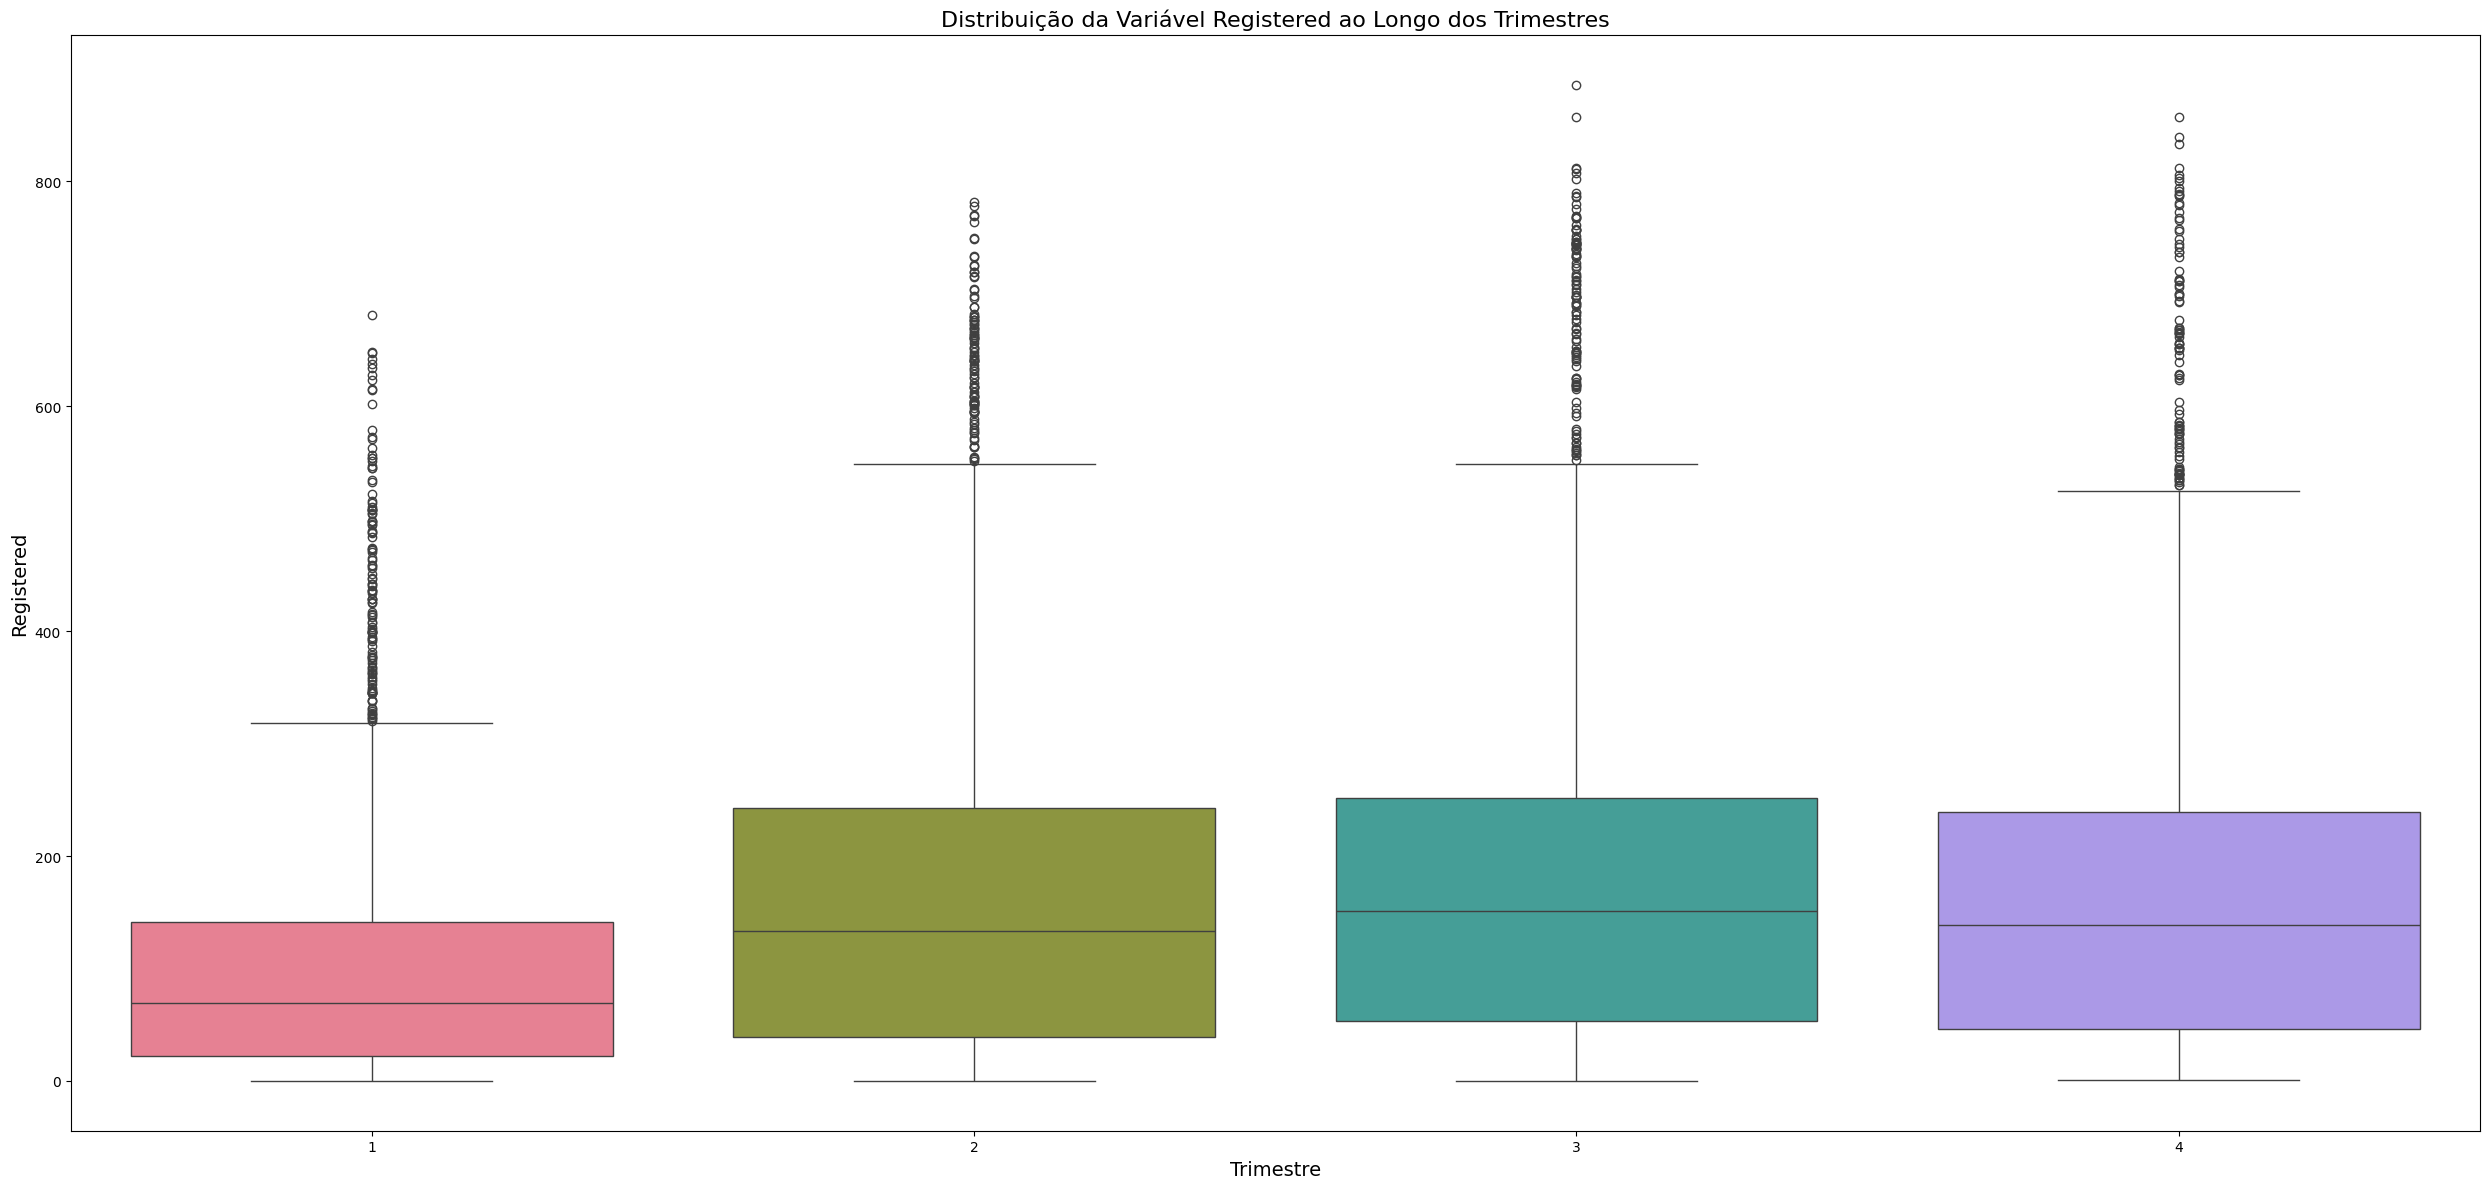

In [25]:
# Ajuste do tamanho da figura
plt.figure(figsize=(25, 12))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 4)

# Boxplot
sns.boxplot(x="quarter", y="registered", data=train, hue="quarter", palette=palette, legend=False)

# Título e rótulos dos eixos
plt.title('Distribuição da Variável Registered ao Longo dos Trimestres', fontsize=16)
plt.xlabel('Trimestre', fontsize=14)
plt.ylabel('Registered', fontsize=14)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_5532\1427674062.py:8: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.boxplot(x="year", y="casual", data=train, hue="year", palette=palette, legend=False)


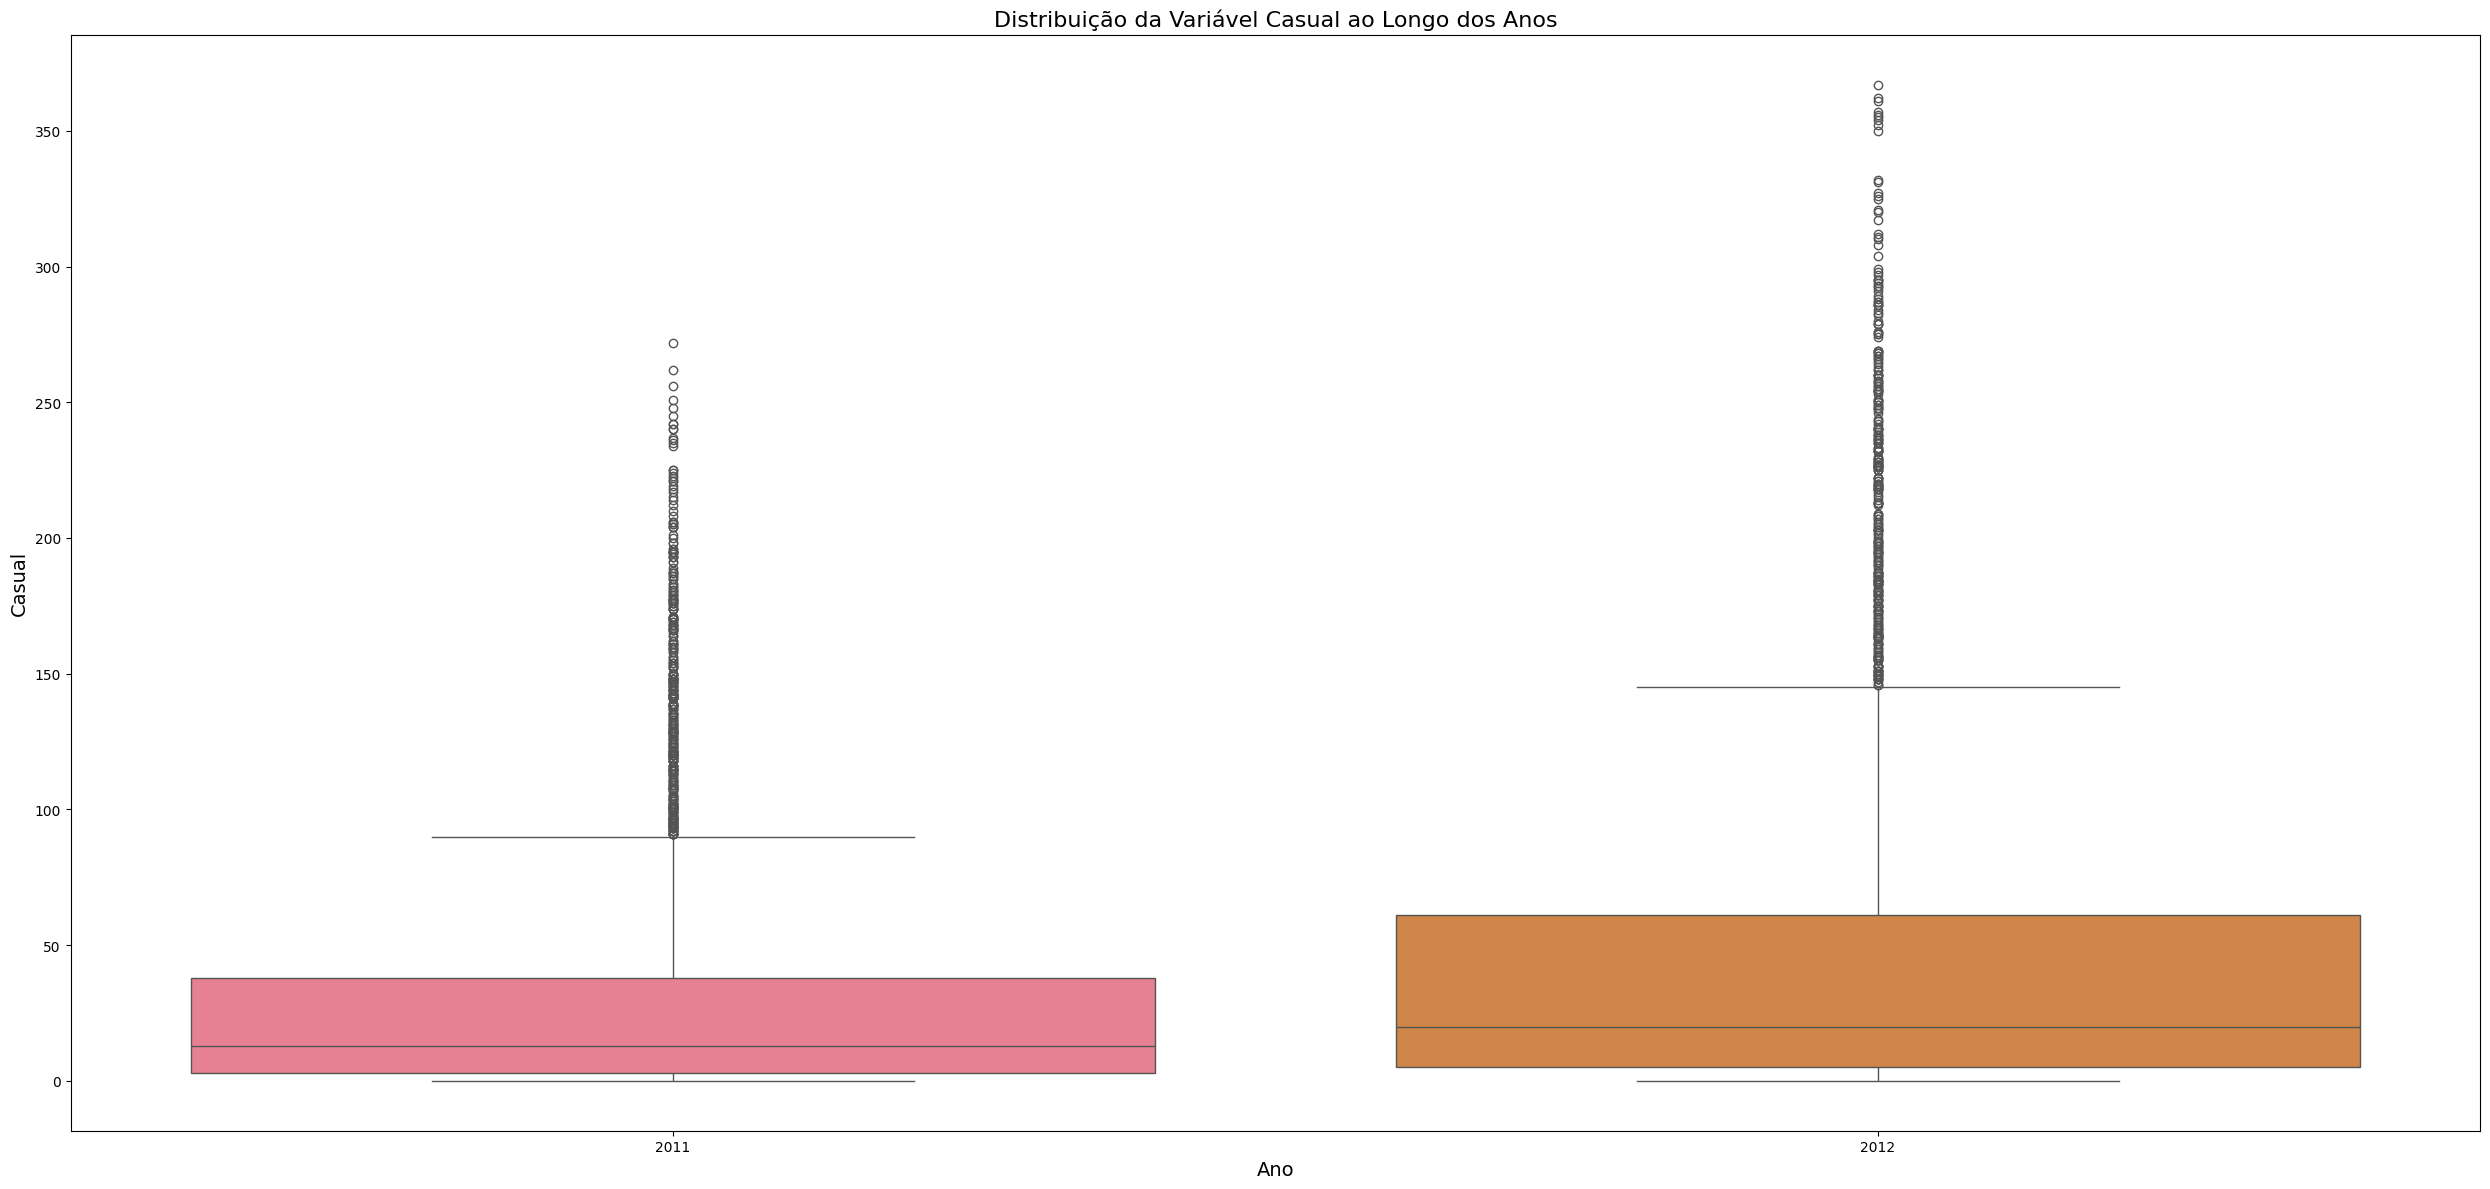

In [26]:
# Ajuste do tamanho da figura
plt.figure(figsize=(25, 12))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 12)

# Boxplot
sns.boxplot(x="year", y="casual", data=train, hue="year", palette=palette, legend=False)

# Título e rótulos dos eixos
plt.title('Distribuição da Variável Casual ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Casual', fontsize=14)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### 5. Criação dos modelos de previsão

In [27]:
# Separando as tabelas de teste e treino
x_train = train.drop(columns=['datetime', 'casual', 'registered', 'count'])
y_train_casual = train["casual"]

x_train = train.drop(columns=['datetime', 'casual', 'registered', 'count'])
y_train_registered = train["registered"]

x_test = test.drop(columns=['datetime'])

In [28]:
# Para predizer os usuários casuais
casual_dec = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', ExtraTreesRegressor(n_estimators=500, random_state=42))
])
casual_dec.fit(x_train, y_train_casual)

# Para predizer os usuários registrados
registered_dec = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', ExtraTreesRegressor(n_estimators=500, random_state=42))
])
registered_dec.fit(x_train, y_train_registered)


Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest',
                 ExtraTreesRegressor(n_estimators=500, random_state=42))])

In [29]:
# Predizendo os valores
y_train_casual = casual_dec.predict(x_train).astype(int)
y_train_registered = registered_dec.predict(x_train).astype(int)

# Substituir valores negativos por zero
y_train_casual = np.maximum(y_train_casual, 0)
y_train_registered = np.maximum(y_train_registered, 0)
y_train_pred = y_train_casual + y_train_registered

# Calcular o Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_true, y_pred):
    log_y_true = np.log1p(y_true)
    log_y_pred = np.log1p(y_pred)
    squared_errors = (log_y_true - log_y_pred) ** 2
    mean_squared_errors = np.mean(squared_errors)
    rmsle = np.sqrt(mean_squared_errors)
    return rmsle

# Calcular o Mean Absolute Error (MAE)
mae = mean_absolute_error(train['count'], y_train_pred)
print("Mean Absolute Error (MAE):", mae)

# Calcular o Mean Squared Error (MSE)
mse = mean_squared_error(train['count'], y_train_pred)
print("Mean Squared Error (MSE):", mse)

# Calcular o Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calcular o Coeficiente de Determinação (R²)
r2 = r2_score(train['count'], y_train_pred)
print("Coefficient of Determination (R²):", r2)

rmsle_value = rmsle(train['count'], y_train_pred)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle_value)

Mean Absolute Error (MAE): 0.001102333272092596
Mean Squared Error (MSE): 0.001102333272092596
Root Mean Squared Error (RMSE): 0.033201404670474347
Coefficient of Determination (R²): 0.9999999664028275
Root Mean Squared Logarithmic Error (RMSLE): 8.921343693413961e-05


### 6. Aplicação dos modelos de previsão nos dados de teste

In [30]:
# Predizendo os valores
y_test_casual = casual_dec.predict(x_test).astype(int)
y_test_registered = registered_dec.predict(x_test).astype(int)

# Substituir valores negativos por zero
y_test_casual = np.maximum(y_test_casual, 0)
y_test_registered = np.maximum(y_test_registered, 0)


In [31]:
# Finalmente a coluna "count"
y_test_count = y_test_casual + y_test_registered

In [32]:
# Criando a tabela de submissão
submited = pd.DataFrame()

submited["datetime"] = test["datetime"]
submited["count"] = y_test_count

submited.set_index("datetime", inplace=True)

In [33]:
submited.head()

,count
datetime,
2011-01-20 00:00:00,13
2011-01-20 01:00:00,5
2011-01-20 02:00:00,4
2011-01-20 03:00:00,2
2011-01-20 04:00:00,2


In [34]:
submited.to_csv("Submission.csv")